# Energy Efficiency Prediction

## Introduction and objectives 

This dataset is obtained from UCI machine learning repository

https://archive.ics.uci.edu/ml/datasets/Energy+efficiency 

There are serveral other online repositories to get datasets for machine learning.
Check for example, https://machinelearningmastery.com/a-guide-to-getting-datasets-for-machine-learning-in-python/ 

The objective is to predict the heating and cooling load requirements (i.e. energy efficiency) given the building characteristics.

In the dataset, there are 768 samples describing different building shapes with eight  characteristics:

    X1 Relative Compactness
    X2 Surface Area
    X3 Wall Area
    X4 Roof Area
    X5 Overall Height
    X6 Orientation
    X7 Glazing Area
    X8 Glazing Area Distribution
    
The corresponding outputs/labels are given as: 
    y1 Heating Load
    y2 Cooling Load


## Question 1: Elementary question               



### 1. Import necessary python libraries and setup the notebook

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

# Routines for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Required for splitting the dataset 
from sklearn.model_selection import train_test_split

# Set label size for plots
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)


### 2. Load and split the dataset

The next code segment reads the ENB2012 dataset as a pandas data frame using pandas.read_csv 
More information with examples can be found at https://machinelearningmastery.com/massaging-data-using-pandas/ 

Also keep in mind that there are several other ways to read data in Python, e.g. using numpy.loadtext, numpy.read_csv, numpy.loadtxt, numpy.genfromtxt(), pandas.read_csv(), etc. Read more at https://machinelearningmastery.com/load-machine-learning-data-python/ 

Note: splitting is done randomly and hence every time you ran the program, you obtain different results.
To ensure that you always get the same results, set the seed of the random generator. 


In [1464]:
columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']
df = pd.read_csv('ENB2012-data.csv', names = columns, skiprows = 1)
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(df.head)

<bound method NDFrame.head of        X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]>


# 3. Explore your training dataset 

## 3.1 Descriptive statistics 

Get some statistical summary of the dataset using `pandas.describe` and the correlation between each pair of variables using `pandas.corr`.   

In [6]:
# Print statistical summary of the train dataset

# YOUR CODE GOES HERE
print(train.describe()
     )


# END of YOUR CODE

               X1          X2          X3          X4          X5          X6  \
count  614.000000  614.000000  614.000000  614.000000  614.000000  614.000000   
mean     0.761678  673.829805  318.819218  177.505293    5.221498    3.511401   
std      0.105424   88.161209   43.335953   44.960238    1.751195    1.108635   
min      0.620000  514.500000  245.000000  110.250000    3.500000    2.000000   
25%      0.660000  612.500000  294.000000  147.000000    3.500000    3.000000   
50%      0.740000  686.000000  318.500000  220.500000    3.500000    4.000000   
75%      0.820000  759.500000  343.000000  220.500000    7.000000    4.000000   
max      0.980000  808.500000  416.500000  220.500000    7.000000    5.000000   

               X7          X8          Y1          Y2  
count  614.000000  614.000000  614.000000  614.000000  
mean     0.235423    2.799674   22.155033   24.410765  
std      0.134152    1.551908   10.054280    9.476566  
min      0.000000    0.000000    6.010000   10

In [7]:
# Print correlation of variables using the train dataset 

# YOUR CODE GOES HERE
print(train.corr())
     

# END of YOUR CODE

          X1        X2        X3        X4        X5        X6        X7  \
X1  1.000000 -0.991923 -0.211912 -0.870389  0.831108 -0.003444  0.009575   
X2 -0.991923  1.000000  0.204776  0.881746 -0.860752  0.005307 -0.012996   
X3 -0.211912  0.204776  1.000000 -0.281167  0.267395  0.014898 -0.019823   
X4 -0.870389  0.881746 -0.281167  1.000000 -0.972779 -0.001977 -0.003189   
X5  0.831108 -0.860752  0.267395 -0.972779  1.000000 -0.007185  0.003697   
X6 -0.003444  0.005307  0.014898 -0.001977 -0.007185  1.000000  0.029363   
X7  0.009575 -0.012996 -0.019823 -0.003189  0.003697  0.029363  1.000000   
X8  0.001160 -0.001782 -0.012122  0.004095 -0.007357  0.010337  0.206917   
Y1  0.629314 -0.664684  0.439092 -0.863294  0.889154  0.001772  0.276184   
Y2  0.642148 -0.679988  0.410905 -0.864714  0.894927  0.008773  0.212642   

          X8        Y1        Y2  
X1  0.001160  0.629314  0.642148  
X2 -0.001782 -0.664684 -0.679988  
X3 -0.012122  0.439092  0.410905  
X4  0.004095 -0.863294 

## 3.2 Scatter diagrams
It is important to explore the dataset before conducting any machine learning work. For example, draw scatter diagrams for each predictor vs each target. 

Scatter diagrams for each predictor VS each target

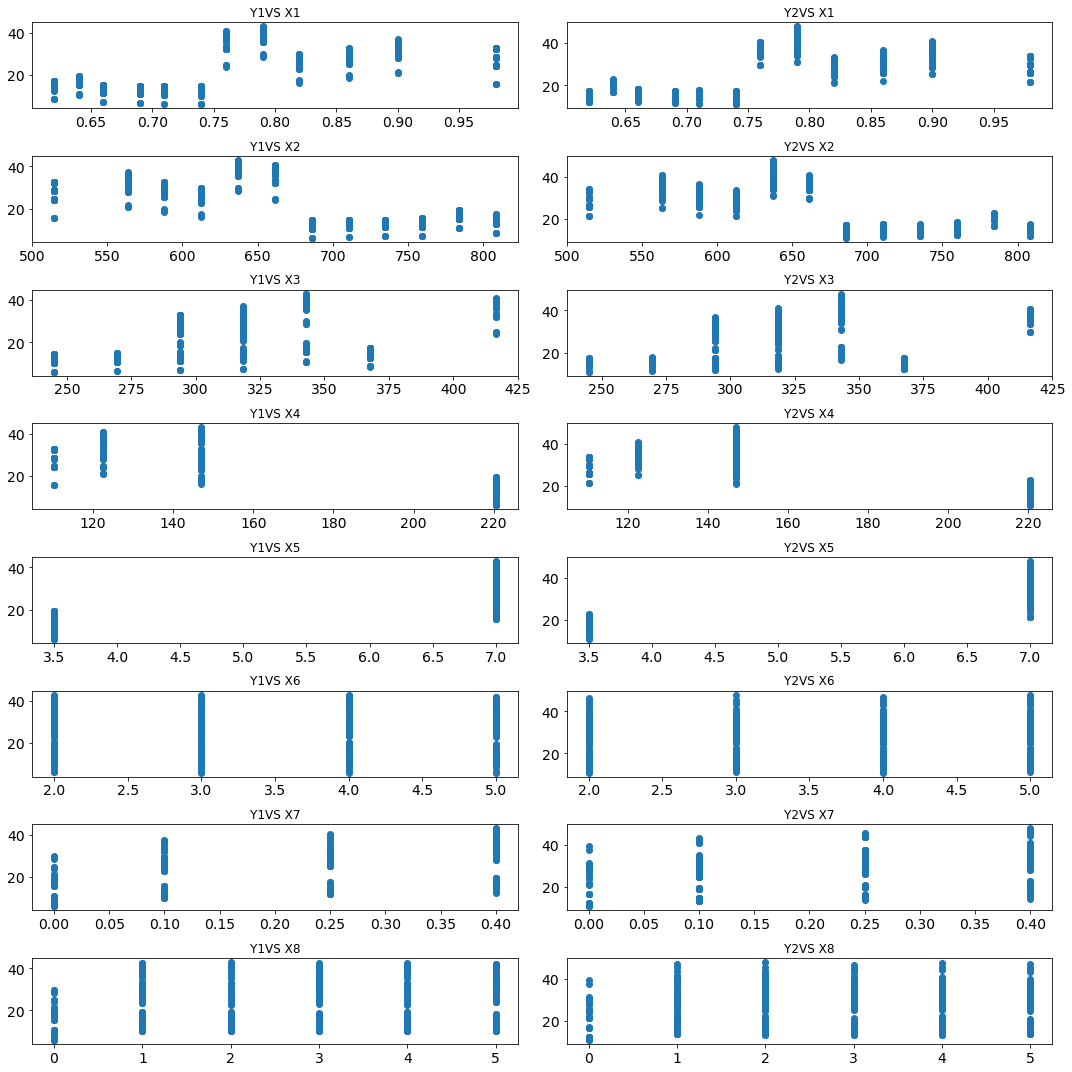

In [381]:
length=len(train.columns)
fig,axis=plt.subplots(length-2,2,figsize=(15,15))
for i in range(0,2):
    for j in range(0,length-2):
        x_axis=train[train.columns[j]]
        y_axis=train[train.columns[i-2]]
        ax= axis[j][i].scatter(x_axis,y_axis)
        axis[j][i].set_title("Y" +str(i+1)+ "VS X" + str(j+1) )
    
    
fig.tight_layout()

# 4. Predict target without using predictors

Compute the mean of Y1 and Y2 to predict each target without knowledge of predictors. 
In this case, the mean squared error (MSE) associated with the prediction is simply the variance of the target.

In [775]:
# Compute the mean and variance for each target variable 

# YOUR CODE GOES HERE

print( 
    'Prediction of Y1: %.4f'
      % train["Y1"].mean() ,
      '\nMSE: %.4f' %  
      train["Y1"].var() , 
      '\nPrediction of Y2: %.4f'%
      train["Y2"].mean(), 
      "\nMSE: %.4f"% 
      train["Y2"].var() 

     )
# END of YOUR CODE

Prediction of Y1: 22.1550 
MSE: 101.0886 
Prediction of Y2: 24.4108 
MSE: 89.8053


# 5. Predict target using a single predictor

To fit a linear regression model,  use `sklearn.linear_model.LinearRegression()` and complete the code snippet below to define a function, `one_feature_regression` that takes `x_train`, `y_train`, `x_test` and `y_test` and fits a linear regressor to predict y. It then plots the data along with the resulting line. 

In [27]:
def one_feature_regressor(x_train, y_train, x_test, y_test):  
    ### Your code starts here ###
    x_train = np.array(x_train).reshape(-1,1)
    x_test = np.array(x_test).reshape(-1,1)
    y_train = np.array(y_train).reshape(-1,1)
    y_test = np.array(y_test).reshape(-1,1)
    

    #Craete an object of linear regression and fit a model
    regr = linear_model.LinearRegression()
    
    regr.fit(x_train,y_train)

    
    # Make predictions using the model 
    y_pred = regr.predict(x_test)

    ### End of your code  ###

    # Plot test data points as well as predictions
    plt.scatter(x_test, y_test)
    plt.scatter(x_test, y_pred)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.show()
    print ("MSE: %.5f" %  mean_squared_error(y_test, y_pred))
    return regr

Testin the defined `one_feature_regression` function with feature X2 to predict Y1.

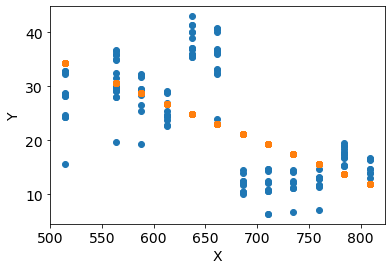

MSE: 62.84823
w = -0.07580
b = 73.23360


In [333]:
regr= one_feature_regressor(train['X2'],train['Y1'],test['X2'],test['Y1'])
print ("w = %.5f" % regr.coef_[0][0])
print ("b = %.5f" % regr.intercept_[0])



# 6. Predict target using a subset of features 

You can predict a target using more than one feature. Complete the code for the following function. 

In [1459]:
def subset_feature_regressor(x_train, y_train):
    # YOUR CODE GOES HERE
    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)
    regr = linear_model.LinearRegression()
    #fitting the data to the linear regression model
    regr.fit(x_train,y_train)
    
    
    # Make predictions using the model 
    y_pred = regr.predict(x_train)
    




    # END of YOUR CODE
    return regr

In [1465]:
regr = subset_feature_regressor(train[['X1', 'X2']], train['Y1'])
print ("w = ", regr.coef_)
print ("b = ", regr.intercept_)
print ("MSE: ", mean_squared_error(test['Y1'], regr.predict(test[['X1', 'X2']])))


w =  [-177.84026436   -0.28674809]
b =  350.8313723976354
MSE:  56.09109494281748


Finally, use all 8 features.

In [1466]:
regr = subset_feature_regressor(train.iloc[:,0:8], train['Y1'])
print ("w = ", regr.coef_)
print ("b = ", regr.intercept_)
print ("MSE: ", mean_squared_error(test['Y1'], regr.predict(test.iloc[:,0:8])))

w =  [-6.24819773e+01 -1.34777125e+12  1.34777125e+12  2.69554250e+12
  4.13612366e+00 -3.67693454e-02  2.01244878e+01  2.09001476e-01]
b =  80.9050325732899
MSE:  9.247653760485939


## Question 2a: Implement an iterative solution  

In this section, you you are required to implement the iterative (gradient descent) solution. The method should take features `x` and predictions `y` of the training set and return back the parameter values including the bias term. You should also initialize the hyper-parameters in the beginning of the method. Also, plot the the cost function at different iterations.
Here, the input consists of:
* training data `x`, and  `y`, which are numpy arrays of dimension `m`-by-`n` and `m`, respectively (if there are `m` training points and `n` features)

The function should find the `n`-dimensional vector `w` and offset `b` that minimize the MSE loss function, and return:
* `w` and `b`
* `losses`, an array containing the MSE loss at each iteration

<span style="color:red">Note:</span> First read and undertand the lecture material. Next, when implementing gradient descent, think carefully about two issues.

1. What is the step size (learning rate)?
2. When has the procedure converged?

Take the time to experiment with different ways of handling these.

In [1549]:
def linear_regression_GD(X, Y, iteration = 10000, learning_rate = 1e-7,threshhold = 1e-7):
    # inputs: trainx and trainy, the features and the target in the training set
    # output: a vector of weights including the bias term
    
    # YOUR CODE GOES HERE
     #setting up the parameters
    
    X=np.asarray(X)
    Y = np.asarray(Y)
    cost = []
    error = []
    omega = []
    bias = []
    iterations = []
    W = np.full((X.shape[1], 1), np.random.randint(-1,1))
    b = np.random.randint(0,80)
    n =  float(len(X))
    prev_cost = 0.0
    

    
    #The iterative loop to update the parameters
    for i in range(iteration):
        

        #The linear functions and the gradients
        Y_hat = np.dot(X , W) + b
        gradw =  (np.dot(-(X.T),(Y - Y_hat))) / n 
        gradb = float(np.mean( Y - Y_hat ))

        
        

        #The update value of W vector and bias term 
        W = W - (gradw * learning_rate)
        b = b - (gradb * learning_rate)
        
        
        current_cost = float(mean_squared_error(Y,Y_hat))
        current_error = float(np.mean((Y-Y_hat)**2))
        current_W = W
        current_b = b
        current_i = i
        
        cost.append(current_cost)
        error.append(current_error)
        omega.append(current_W)
        bias.append(current_b)
        iterations.append(i)
        
        
        if abs(prev_cost-current_cost)<=  threshhold:
            break
    
    
        prev_cost = current_cost
                # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \n {W}, \n Bias {b} ")
    
    #plot the cost for each iteration
    plt.scatter(iterations, cost)
    return W , b , current_cost
    
    


    
    # END of YOUR CODE

Iteration 1: Cost 1432980.7378482085, Weight 
 [[-0.99991072]
 [-0.91869508]
 [-0.96183373]
 [-0.97843068]
 [-0.99939573]
 [-0.99958196]
 [-0.99997197]
 [-0.99966659]], 
 Bias 14.99988101609772 
Iteration 2: Cost 1267402.1088935265, Weight 
 [[-0.99982674]
 [-0.84223366]
 [-0.92593664]
 [-0.95814851]
 [-0.99882726]
 [-0.99918879]
 [-0.99994561]
 [-0.999353  ]], 
 Bias 14.999769110995347 
Iteration 3: Cost 1120959.1100242503, Weight 
 [[-0.99974775]
 [-0.77032727]
 [-0.89217359]
 [-0.93907684]
 [-0.99829245]
 [-0.99881899]
 [-0.99992082]
 [-0.99905804]], 
 Bias 14.999663863097288 
Iteration 4: Cost 991440.2684851551, Weight 
 [[-0.99967346]
 [-0.70270461]
 [-0.86041749]
 [-0.92114356]
 [-0.9977893 ]
 [-0.99847119]
 [-0.99989749]
 [-0.9987806 ]], 
 Bias 14.999564875917224 
Iteration 5: Cost 876889.687728719, Weight 
 [[-0.99960357]
 [-0.63911057]
 [-0.8305488 ]
 [-0.90428089]
 [-0.99731593]
 [-0.99814407]
 [-0.99987555]
 [-0.99851964]], 
 Bias 14.999471776582663 
Iteration 6: Cost 775577

Iteration 305: Cost 211.97660471518705, Weight 
 [[-0.99843986]
 [ 0.35979093]
 [-0.34112488]
 [-0.64954209]
 [-0.98895488]
 [-0.9928196 ]
 [-0.9995083 ]
 [-0.99419617]], 
 Bias 14.997966478724397 
Iteration 306: Cost 211.8689670386714, Weight 
 [[-0.99843966]
 [ 0.35977323]
 [-0.34106522]
 [-0.64958077]
 [-0.98895188]
 [-0.99281905]
 [-0.99950823]
 [-0.99419547]], 
 Bias 14.997966358446702 
Iteration 307: Cost 211.76140090217083, Weight 
 [[-0.99843945]
 [ 0.35975554]
 [-0.34100558]
 [-0.64961944]
 [-0.98894887]
 [-0.99281851]
 [-0.99950816]
 [-0.99419476]], 
 Bias 14.997966238193884 
Iteration 308: Cost 211.65390625812907, Weight 
 [[-0.99843925]
 [ 0.35973785]
 [-0.34094595]
 [-0.6496581 ]
 [-0.98894587]
 [-0.99281796]
 [-0.99950808]
 [-0.99419406]], 
 Bias 14.997966117965934 
Iteration 309: Cost 211.5464830590236, Weight 
 [[-0.99843904]
 [ 0.35972017]
 [-0.34088635]
 [-0.64969674]
 [-0.98894287]
 [-0.99281741]
 [-0.99950801]
 [-0.99419335]], 
 Bias 14.99796599776284 
Iteration 310

Iteration 609: Cost 182.33972170895203, Weight 
 [[-0.99837953]
 [ 0.35467217]
 [-0.32387109]
 [-0.66072837]
 [-0.98807664]
 [-0.99265758]
 [-0.99948652]
 [-0.9939849 ]], 
 Bias 14.99793102063842 
Iteration 610: Cost 182.25178151809655, Weight 
 [[-0.99837934]
 [ 0.35465617]
 [-0.32381716]
 [-0.66076334]
 [-0.98807386]
 [-0.99265706]
 [-0.99948645]
 [-0.99398422]], 
 Bias 14.997930907541207 
Iteration 611: Cost 182.16389977370685, Weight 
 [[-0.99837915]
 [ 0.35464018]
 [-0.32376325]
 [-0.66079829]
 [-0.98807109]
 [-0.99265654]
 [-0.99948638]
 [-0.99398353]], 
 Bias 14.997930794466434 
Iteration 612: Cost 182.07607643693294, Weight 
 [[-0.99837896]
 [ 0.35462419]
 [-0.32370936]
 [-0.66083323]
 [-0.98806831]
 [-0.99265602]
 [-0.99948631]
 [-0.99398285]], 
 Bias 14.997930681414095 
Iteration 613: Cost 181.9883114689485, Weight 
 [[-0.99837877]
 [ 0.35460821]
 [-0.32365549]
 [-0.66086815]
 [-0.98806553]
 [-0.9926555 ]
 [-0.99948623]
 [-0.99398216]], 
 Bias 14.997930568384183 
Iteration 61

Iteration 877: Cost 160.74484244672874, Weight 
 [[-0.99832951]
 [ 0.35056926]
 [-0.31004206]
 [-0.66969434]
 [-0.98735686]
 [-0.99252109]
 [-0.9994677 ]
 [-0.99380312]], 
 Bias 14.997901490321423 
Iteration 878: Cost 160.6712543318039, Weight 
 [[-0.99832933]
 [ 0.35055463]
 [-0.30999274]
 [-0.66972632]
 [-0.98735426]
 [-0.99252059]
 [-0.99946763]
 [-0.99380245]], 
 Bias 14.997901382979201 
Iteration 879: Cost 160.59771512306327, Weight 
 [[-0.99832915]
 [ 0.35054   ]
 [-0.30994343]
 [-0.66975829]
 [-0.98735167]
 [-0.99252009]
 [-0.99946756]
 [-0.99380178]], 
 Bias 14.997901275657506 
Iteration 880: Cost 160.5242247879972, Weight 
 [[-0.99832897]
 [ 0.35052537]
 [-0.30989413]
 [-0.66979025]
 [-0.98734907]
 [-0.99251959]
 [-0.99946749]
 [-0.99380111]], 
 Bias 14.997901168356334 
Iteration 881: Cost 160.45078329411757, Weight 
 [[-0.99832878]
 [ 0.35051075]
 [-0.30984485]
 [-0.6698222 ]
 [-0.98734648]
 [-0.99251909]
 [-0.99946742]
 [-0.99380044]], 
 Bias 14.997901061075677 
Iteration 88

Iteration 1052: Cost 148.58377410202257, Weight 
 [[-0.99829832]
 [ 0.3480808 ]
 [-0.3016549 ]
 [-0.67513215]
 [-0.9869122 ]
 [-0.99243491]
 [-0.99945559]
 [-0.9936865 ]], 
 Bias 14.997883012074018 
Iteration 1053: Cost 148.51826805511206, Weight 
 [[-0.99829814]
 [ 0.34806699]
 [-0.30160836]
 [-0.67516232]
 [-0.98690971]
 [-0.99243442]
 [-0.99945552]
 [-0.99368584]], 
 Bias 14.997882908222389 
Iteration 1054: Cost 148.45280554197757, Weight 
 [[-0.99829797]
 [ 0.34805319]
 [-0.30156184]
 [-0.67519249]
 [-0.98690722]
 [-0.99243394]
 [-0.99945545]
 [-0.99368518]], 
 Bias 14.997882804390128 
Iteration 1055: Cost 148.38738653368156, Weight 
 [[-0.99829779]
 [ 0.34803939]
 [-0.30151533]
 [-0.67522264]
 [-0.98690474]
 [-0.99243345]
 [-0.99945538]
 [-0.99368451]], 
 Bias 14.99788270057723 
Iteration 1056: Cost 148.32201100130325, Weight 
 [[-0.99829762]
 [ 0.34802559]
 [-0.30146884]
 [-0.67525278]
 [-0.98690226]
 [-0.99243296]
 [-0.99945531]
 [-0.99368385]], 
 Bias 14.997882596783688 
Iterat

Iteration 1300: Cost 133.60181419290973, Weight 
 [[-0.99825596]
 [ 0.34479327]
 [-0.29057497]
 [-0.68231588]
 [-0.98631381]
 [-0.99231647]
 [-0.99943865]
 [-0.99352384]], 
 Bias 14.997857834257205 
Iteration 1301: Cost 133.54626460737063, Weight 
 [[-0.99825579]
 [ 0.34478055]
 [-0.29053212]
 [-0.68234366]
 [-0.98631147]
 [-0.992316  ]
 [-0.99943858]
 [-0.99352319]], 
 Bias 14.99785773501719 
Iteration 1302: Cost 133.49075193723021, Weight 
 [[-0.99825562]
 [ 0.34476784]
 [-0.29048928]
 [-0.68237144]
 [-0.98630913]
 [-0.99231554]
 [-0.99943851]
 [-0.99352254]], 
 Bias 14.997857635795011 
Iteration 1303: Cost 133.4352761579507, Weight 
 [[-0.99825546]
 [ 0.34475514]
 [-0.29044646]
 [-0.6823992 ]
 [-0.98630679]
 [-0.99231507]
 [-0.99943845]
 [-0.99352189]], 
 Bias 14.997857536590663 
Iteration 1304: Cost 133.3798372450083, Weight 
 [[-0.99825529]
 [ 0.34474243]
 [-0.29040365]
 [-0.68242696]
 [-0.98630445]
 [-0.9923146 ]
 [-0.99943838]
 [-0.99352124]], 
 Bias 14.997857437404141 
Iteratio

Iteration 1617: Cost 117.71895299203545, Weight 
 [[-0.99820471]
 [ 0.34096708]
 [-0.27768029]
 [-0.69067632]
 [-0.98559893]
 [-0.9921709 ]
 [-0.99941735]
 [-0.99332002]], 
 Bias 14.997827238170236 
Iteration 1618: Cost 117.67395802332936, Weight 
 [[-0.99820456]
 [ 0.34095563]
 [-0.27764173]
 [-0.69070132]
 [-0.98559676]
 [-0.99217045]
 [-0.99941728]
 [-0.99331939]], 
 Bias 14.997827144297728 
Iteration 1619: Cost 117.62899295403221, Weight 
 [[-0.9982044 ]
 [ 0.34094419]
 [-0.27760318]
 [-0.69072631]
 [-0.98559458]
 [-0.99217   ]
 [-0.99941722]
 [-0.99331875]], 
 Bias 14.997827050441273 
Iteration 1620: Cost 117.5840577642696, Weight 
 [[-0.99820424]
 [ 0.34093276]
 [-0.27756464]
 [-0.6907513 ]
 [-0.98559241]
 [-0.99216955]
 [-0.99941715]
 [-0.99331811]], 
 Bias 14.997826956600868 
Iteration 1621: Cost 117.53915243418021, Weight 
 [[-0.99820409]
 [ 0.34092133]
 [-0.27752612]
 [-0.69077628]
 [-0.98559024]
 [-0.9921691 ]
 [-0.99941708]
 [-0.99331748]], 
 Bias 14.997826862776504 
Iterat

Iteration 1929: Cost 105.03639632399583, Weight 
 [[-0.99815717]
 [ 0.33757514]
 [-0.26624988]
 [-0.69808749]
 [-0.98494502]
 [-0.99203341]
 [-0.99939674]
 [-0.9931235 ]], 
 Bias 14.997798702735892 
Iteration 1930: Cost 104.99982867882325, Weight 
 [[-0.99815702]
 [ 0.33756482]
 [-0.26621511]
 [-0.69811003]
 [-0.984943  ]
 [-0.99203298]
 [-0.99939667]
 [-0.99312288]], 
 Bias 14.997798613622004 
Iteration 1931: Cost 104.9632853311506, Weight 
 [[-0.99815687]
 [ 0.33755451]
 [-0.26618036]
 [-0.69813256]
 [-0.98494098]
 [-0.99203255]
 [-0.99939661]
 [-0.99312225]], 
 Bias 14.99779852452259 
Iteration 1932: Cost 104.92676626482641, Weight 
 [[-0.99815672]
 [ 0.3375442 ]
 [-0.26614563]
 [-0.69815509]
 [-0.98493896]
 [-0.99203211]
 [-0.99939654]
 [-0.99312163]], 
 Bias 14.997798435437643 
Iteration 1933: Cost 104.8902714637103, Weight 
 [[-0.99815657]
 [ 0.3375339 ]
 [-0.2661109 ]
 [-0.6981776 ]
 [-0.98493694]
 [-0.99203168]
 [-0.99939648]
 [-0.99312101]], 
 Bias 14.997798346367158 
Iteratio

Iteration 2262: Cost 94.10915488252408, Weight 
 [[-0.99810926]
 [ 0.33432276]
 [-0.25529058]
 [-0.70519333]
 [-0.984296  ]
 [-0.99189236]
 [-0.99937508]
 [-0.99291777]], 
 Bias 14.997769799302292 
Iteration 2263: Cost 94.07984753343369, Weight 
 [[-0.99810912]
 [ 0.33431352]
 [-0.25525946]
 [-0.70521351]
 [-0.98429412]
 [-0.99189194]
 [-0.99937502]
 [-0.99291716]], 
 Bias 14.99776971475157 
Iteration 2264: Cost 94.05055965569376, Weight 
 [[-0.99810898]
 [ 0.33430429]
 [-0.25522836]
 [-0.70523367]
 [-0.98429225]
 [-0.99189152]
 [-0.99937495]
 [-0.99291655]], 
 Bias 14.997769630213805 
Iteration 2265: Cost 94.02129123636115, Weight 
 [[-0.99810884]
 [ 0.33429506]
 [-0.25519726]
 [-0.70525384]
 [-0.98429037]
 [-0.99189111]
 [-0.99937489]
 [-0.99291594]], 
 Bias 14.997769545688993 
Iteration 2266: Cost 93.99204226250157, Weight 
 [[-0.9981087 ]
 [ 0.33428584]
 [-0.25516618]
 [-0.70527399]
 [-0.98428849]
 [-0.99189069]
 [-0.99937482]
 [-0.99291532]], 
 Bias 14.99776946117713 
Iteration 22

Iteration 2510: Cost 87.4060756874306, Weight 
 [[-0.9980753 ]
 [ 0.33212405]
 [-0.24788233]
 [-0.70999681]
 [-0.98384236]
 [-0.99179076]
 [-0.99935916]
 [-0.992767  ]], 
 Bias 14.997749216980468 
Iteration 2511: Cost 87.38122156458327, Weight 
 [[-0.99807517]
 [ 0.33211555]
 [-0.24785368]
 [-0.71001539]
 [-0.98384058]
 [-0.99179036]
 [-0.9993591 ]
 [-0.99276639]], 
 Bias 14.997749135514809 
Iteration 2512: Cost 87.356383952886, Weight 
 [[-0.99807503]
 [ 0.33210704]
 [-0.24782504]
 [-0.71003396]
 [-0.9838388 ]
 [-0.99178995]
 [-0.99935904]
 [-0.99276579]], 
 Bias 14.997749054061083 
Iteration 2513: Cost 87.3315628413631, Weight 
 [[-0.9980749 ]
 [ 0.33209855]
 [-0.2477964 ]
 [-0.71005253]
 [-0.98383702]
 [-0.99178955]
 [-0.99935897]
 [-0.99276519]], 
 Bias 14.997748972619286 
Iteration 2514: Cost 87.30675821904688, Weight 
 [[-0.99807477]
 [ 0.33209005]
 [-0.24776778]
 [-0.71007108]
 [-0.98383524]
 [-0.99178915]
 [-0.99935891]
 [-0.99276458]], 
 Bias 14.997748891189413 
Iteration 2515

Iteration 2789: Cost 81.07453217653911, Weight 
 [[-0.99803871]
 [ 0.32985779]
 [-0.24024706]
 [-0.71494757]
 [-0.98335957]
 [-0.99167968]
 [-0.99934145]
 [-0.99259964]], 
 Bias 14.997726936942195 
Iteration 2790: Cost 81.05388399306669, Weight 
 [[-0.99803858]
 [ 0.32985004]
 [-0.24022095]
 [-0.7149645 ]
 [-0.98335789]
 [-0.99167929]
 [-0.99934139]
 [-0.99259905]], 
 Bias 14.997726858656605 
Iteration 2791: Cost 81.0332495249232, Weight 
 [[-0.99803845]
 [ 0.32984229]
 [-0.24019485]
 [-0.71498143]
 [-0.98335621]
 [-0.99167889]
 [-0.99934132]
 [-0.99259845]], 
 Bias 14.997726780381893 
Iteration 2792: Cost 81.01262876299216, Weight 
 [[-0.99803832]
 [ 0.32983455]
 [-0.24016876]
 [-0.71499835]
 [-0.98335453]
 [-0.9916785 ]
 [-0.99934126]
 [-0.99259785]], 
 Bias 14.997726702118053 
Iteration 2793: Cost 80.99202169816198, Weight 
 [[-0.99803819]
 [ 0.32982681]
 [-0.24014267]
 [-0.71501526]
 [-0.98335285]
 [-0.99167811]
 [-0.9993412 ]
 [-0.99259726]], 
 Bias 14.997726623865082 
Iteration 2

Iteration 3101: Cost 75.25425946331943, Weight 
 [[-0.99799961]
 [ 0.3275604 ]
 [-0.23250763]
 [-0.71996599]
 [-0.98285117]
 [-0.99155912]
 [-0.99932186]
 [-0.99241508]], 
 Bias 14.99770302186173 
Iteration 3102: Cost 75.237477025735, Weight 
 [[-0.99799949]
 [ 0.32755341]
 [-0.23248409]
 [-0.71998125]
 [-0.98284959]
 [-0.99155874]
 [-0.9993218 ]
 [-0.99241449]], 
 Bias 14.997702946800183 
Iteration 3103: Cost 75.2207057337967, Weight 
 [[-0.99799936]
 [ 0.32754643]
 [-0.23246056]
 [-0.7199965 ]
 [-0.98284801]
 [-0.99155836]
 [-0.99932174]
 [-0.99241391]], 
 Bias 14.997702871748443 
Iteration 3104: Cost 75.20394558009525, Weight 
 [[-0.99799924]
 [ 0.32753945]
 [-0.23243704]
 [-0.72001176]
 [-0.98284643]
 [-0.99155798]
 [-0.99932168]
 [-0.99241332]], 
 Bias 14.997702796706506 
Iteration 3105: Cost 75.18719655722705, Weight 
 [[-0.99799912]
 [ 0.32753247]
 [-0.23241353]
 [-0.720027  ]
 [-0.98284486]
 [-0.9915576 ]
 [-0.99932161]
 [-0.99241273]], 
 Bias 14.997702721674367 
Iteration 3106

Iteration 3422: Cost 70.40112670368377, Weight 
 [[-0.99796121]
 [ 0.32543274]
 [-0.22534078]
 [-0.72461324]
 [-0.98235949]
 [-0.99143874]
 [-0.99930193]
 [-0.99222778]], 
 Bias 14.997679413404814 
Iteration 3423: Cost 70.38756703206263, Weight 
 [[-0.99796109]
 [ 0.32542646]
 [-0.22531963]
 [-0.72462696]
 [-0.982358  ]
 [-0.99143837]
 [-0.99930187]
 [-0.9922272 ]], 
 Bias 14.99767934132943 
Iteration 3424: Cost 70.37401636381327, Weight 
 [[-0.99796097]
 [ 0.32542018]
 [-0.22529848]
 [-0.72464067]
 [-0.98235652]
 [-0.991438  ]
 [-0.99930181]
 [-0.99222662]], 
 Bias 14.99767926926286 
Iteration 3425: Cost 70.3604746929509, Weight 
 [[-0.99796086]
 [ 0.32541391]
 [-0.22527734]
 [-0.72465437]
 [-0.98235503]
 [-0.99143763]
 [-0.99930175]
 [-0.99222604]], 
 Bias 14.997679197205102 
Iteration 3426: Cost 70.34694201349481, Weight 
 [[-0.99796074]
 [ 0.32540764]
 [-0.22525621]
 [-0.72466808]
 [-0.98235355]
 [-0.99143726]
 [-0.99930169]
 [-0.99222546]], 
 Bias 14.997679125156152 
Iteration 342

Iteration 3769: Cost 66.1973436409334, Weight 
 [[-0.99792156]
 [ 0.32337429]
 [-0.21840796]
 [-0.72910887]
 [-0.98186009]
 [-0.99131235]
 [-0.99928061]
 [-0.99202795]], 
 Bias 14.997654912734045 
Iteration 3770: Cost 66.18657482778583, Weight 
 [[-0.99792145]
 [ 0.3233687 ]
 [-0.21838911]
 [-0.72912109]
 [-0.9818587 ]
 [-0.99131199]
 [-0.99928055]
 [-0.99202738]], 
 Bias 14.997654843548045 
Iteration 3771: Cost 66.17581316283884, Weight 
 [[-0.99792134]
 [ 0.3233631 ]
 [-0.21837028]
 [-0.72913331]
 [-0.9818573 ]
 [-0.99131163]
 [-0.99928049]
 [-0.99202681]], 
 Bias 14.997654774369899 
Iteration 3772: Cost 66.16505864134126, Weight 
 [[-0.99792122]
 [ 0.32335751]
 [-0.21835144]
 [-0.72914552]
 [-0.98185591]
 [-0.99131127]
 [-0.99928043]
 [-0.99202624]], 
 Bias 14.997654705199604 
Iteration 3773: Cost 66.15431125854438, Weight 
 [[-0.99792111]
 [ 0.32335192]
 [-0.21833262]
 [-0.72915773]
 [-0.98185452]
 [-0.99131091]
 [-0.99928037]
 [-0.99202566]], 
 Bias 14.99765463603716 
Iteration 37

Iteration 4110: Cost 62.9101063117642, Weight 
 [[-0.99788429]
 [ 0.32157006]
 [-0.21233224]
 [-0.73304885]
 [-0.9813984 ]
 [-0.99119153]
 [-0.99925987]
 [-0.99183398]], 
 Bias 14.997631759048547 
Iteration 4111: Cost 62.901519161485105, Weight 
 [[-0.99788418]
 [ 0.32156506]
 [-0.21231542]
 [-0.73305976]
 [-0.98139709]
 [-0.99119118]
 [-0.99925981]
 [-0.99183341]], 
 Bias 14.997631692395455 
Iteration 4112: Cost 62.89293770918768, Weight 
 [[-0.99788407]
 [ 0.32156007]
 [-0.2122986 ]
 [-0.73307066]
 [-0.98139578]
 [-0.99119083]
 [-0.99925975]
 [-0.99183285]], 
 Bias 14.997631625749376 
Iteration 4113: Cost 62.884361951084, Weight 
 [[-0.99788397]
 [ 0.32155507]
 [-0.21228179]
 [-0.73308157]
 [-0.98139446]
 [-0.99119048]
 [-0.99925969]
 [-0.99183228]], 
 Bias 14.99763155911031 
Iteration 4114: Cost 62.87579188338937, Weight 
 [[-0.99788386]
 [ 0.32155008]
 [-0.21226499]
 [-0.73309246]
 [-0.98139315]
 [-0.99119013]
 [-0.99925963]
 [-0.99183171]], 
 Bias 14.997631492478254 
Iteration 411

Iteration 4450: Cost 60.29557490285944, Weight 
 [[-0.99784861]
 [ 0.31996364]
 [-0.20692357]
 [-0.73655639]
 [-0.98096367]
 [-0.99107404]
 [-0.99923937]
 [-0.99164268]], 
 Bias 14.997609486524471 
Iteration 4451: Cost 60.28872225708122, Weight 
 [[-0.99784851]
 [ 0.31995918]
 [-0.20690855]
 [-0.73656614]
 [-0.98096243]
 [-0.9910737 ]
 [-0.99923931]
 [-0.99164212]], 
 Bias 14.997609422126935 
Iteration 4452: Cost 60.28187415630566, Weight 
 [[-0.9978484 ]
 [ 0.31995472]
 [-0.20689353]
 [-0.73657588]
 [-0.98096118]
 [-0.99107336]
 [-0.99923925]
 [-0.99164156]], 
 Bias 14.997609357735664 
Iteration 4453: Cost 60.27503059751176, Weight 
 [[-0.9978483 ]
 [ 0.31995026]
 [-0.20687852]
 [-0.73658561]
 [-0.98095994]
 [-0.99107302]
 [-0.99923919]
 [-0.991641  ]], 
 Bias 14.997609293350656 
Iteration 4454: Cost 60.26819157767979, Weight 
 [[-0.9978482 ]
 [ 0.3199458 ]
 [-0.20686351]
 [-0.73659534]
 [-0.9809587 ]
 [-0.99107268]
 [-0.99923913]
 [-0.99164044]], 
 Bias 14.99760922897191 
Iteration 4

Iteration 4766: Cost 58.34139119455365, Weight 
 [[-0.99781665]
 [ 0.31862494]
 [-0.20241709]
 [-0.73947898]
 [-0.98058015]
 [-0.99096724]
 [-0.99922045]
 [-0.99146658]], 
 Bias 14.99758943818926 
Iteration 4767: Cost 58.33583434367907, Weight 
 [[-0.99781655]
 [ 0.31862092]
 [-0.20240357]
 [-0.73948775]
 [-0.98057896]
 [-0.99096691]
 [-0.99922039]
 [-0.99146603]], 
 Bias 14.997589375671698 
Iteration 4768: Cost 58.330281176452225, Weight 
 [[-0.99781645]
 [ 0.31861691]
 [-0.20239006]
 [-0.73949652]
 [-0.98057778]
 [-0.99096658]
 [-0.99922033]
 [-0.99146547]], 
 Bias 14.997589313159777 
Iteration 4769: Cost 58.32473169042495, Weight 
 [[-0.99781635]
 [ 0.31861289]
 [-0.20237654]
 [-0.73950528]
 [-0.9805766 ]
 [-0.99096624]
 [-0.99922028]
 [-0.99146492]], 
 Bias 14.997589250653496 
Iteration 4770: Cost 58.31918588315006, Weight 
 [[-0.99781625]
 [ 0.31860888]
 [-0.20236304]
 [-0.73951404]
 [-0.98057541]
 [-0.99096591]
 [-0.99922022]
 [-0.99146436]], 
 Bias 14.997589188152853 
Iteration 

 Bias 14.997573918518441 
Iteration 5018: Cost 57.05136892063005, Weight 
 [[-0.9977919 ]
 [ 0.3176537 ]
 [-0.19914818]
 [-0.74159906]
 [-0.98028711]
 [-0.99088357]
 [-0.99920546]
 [-0.99132721]], 
 Bias 14.997573857359843 
Iteration 5019: Cost 57.04666702651682, Weight 
 [[-0.9977918 ]
 [ 0.31765001]
 [-0.19913575]
 [-0.74160712]
 [-0.98028597]
 [-0.99088324]
 [-0.9992054 ]
 [-0.99132666]], 
 Bias 14.997573796206435 
Iteration 5020: Cost 57.04196824773594, Weight 
 [[-0.9977917 ]
 [ 0.31764631]
 [-0.19912332]
 [-0.74161518]
 [-0.98028483]
 [-0.99088291]
 [-0.99920534]
 [-0.99132611]], 
 Bias 14.997573735058216 
Iteration 5021: Cost 57.037272582216296, Weight 
 [[-0.99779161]
 [ 0.31764262]
 [-0.19911089]
 [-0.74162324]
 [-0.98028369]
 [-0.99088258]
 [-0.99920529]
 [-0.99132555]], 
 Bias 14.997573673915186 
Iteration 5022: Cost 57.03258002788842, Weight 
 [[-0.99779151]
 [ 0.31763893]
 [-0.19909847]
 [-0.7416313 ]
 [-0.98028255]
 [-0.99088225]
 [-0.99920523]
 [-0.991325  ]], 
 Bias 14.

Iteration 5316: Cost 55.77945179509451, Weight 
 [[-0.99776341]
 [ 0.31660539]
 [-0.19562048]
 [-0.74388707]
 [-0.97995392]
 [-0.99078617]
 [-0.99918783]
 [-0.9911635 ]], 
 Bias 14.9975558559509 
Iteration 5317: Cost 55.77559235537043, Weight 
 [[-0.99776331]
 [ 0.31660204]
 [-0.19560922]
 [-0.74389437]
 [-0.97995282]
 [-0.99078585]
 [-0.99918777]
 [-0.99116295]], 
 Bias 14.997555796270163 
Iteration 5318: Cost 55.77173547097363, Weight 
 [[-0.99776322]
 [ 0.3165987 ]
 [-0.19559796]
 [-0.74390167]
 [-0.97995173]
 [-0.99078552]
 [-0.99918771]
 [-0.9911624 ]], 
 Bias 14.997555736594128 
Iteration 5319: Cost 55.76788114020567, Weight 
 [[-0.99776313]
 [ 0.31659535]
 [-0.19558671]
 [-0.74390897]
 [-0.97995063]
 [-0.9907852 ]
 [-0.99918765]
 [-0.99116185]], 
 Bias 14.997555676922792 
Iteration 5320: Cost 55.76402936136897, Weight 
 [[-0.99776303]
 [ 0.31659201]
 [-0.19557547]
 [-0.74391626]
 [-0.97994954]
 [-0.99078487]
 [-0.99918759]
 [-0.99116131]], 
 Bias 14.997555617256154 
Iteration 53

Iteration 5631: Cost 54.68177380366102, Weight 
 [[-0.99773412]
 [ 0.31560455]
 [-0.19225332]
 [-0.74607107]
 [-0.97961598]
 [-0.99068488]
 [-0.99916929]
 [-0.99099162]], 
 Bias 14.997537281158737 
Iteration 5632: Cost 54.67864082366565, Weight 
 [[-0.99773403]
 [ 0.31560154]
 [-0.19224318]
 [-0.74607764]
 [-0.97961493]
 [-0.99068456]
 [-0.99916923]
 [-0.99099108]], 
 Bias 14.997537222884267 
Iteration 5633: Cost 54.675509916098534, Weight 
 [[-0.99773394]
 [ 0.31559853]
 [-0.19223305]
 [-0.74608421]
 [-0.97961388]
 [-0.99068425]
 [-0.99916918]
 [-0.99099054]], 
 Bias 14.997537164614032 
Iteration 5634: Cost 54.672381079581456, Weight 
 [[-0.99773385]
 [ 0.31559552]
 [-0.19222292]
 [-0.74609078]
 [-0.97961283]
 [-0.99068393]
 [-0.99916912]
 [-0.99098999]], 
 Bias 14.99753710634803 
Iteration 5635: Cost 54.66925431273813, Weight 
 [[-0.99773376]
 [ 0.31559251]
 [-0.19221279]
 [-0.74609735]
 [-0.97961178]
 [-0.99068361]
 [-0.99916906]
 [-0.99098945]], 
 Bias 14.99753704808626 
Iteration 

Iteration 5886: Cost 53.946369508381295, Weight 
 [[-0.99771098]
 [ 0.3148677 ]
 [-0.18977484]
 [-0.74767873]
 [-0.97935218]
 [-0.99060403]
 [-0.99915435]
 [-0.9908533 ]], 
 Bias 14.99752255454767 
Iteration 5887: Cost 53.94372278346739, Weight 
 [[-0.99771089]
 [ 0.31486493]
 [-0.18976553]
 [-0.74768477]
 [-0.97935116]
 [-0.99060371]
 [-0.9991543 ]
 [-0.99085276]], 
 Bias 14.997522497308777 
Iteration 5888: Cost 53.94107780775333, Weight 
 [[-0.9977108 ]
 [ 0.31486216]
 [-0.18975623]
 [-0.74769081]
 [-0.97935014]
 [-0.9906034 ]
 [-0.99915424]
 [-0.99085222]], 
 Bias 14.997522440073777 
Iteration 5889: Cost 53.93843458007663, Weight 
 [[-0.99771071]
 [ 0.31485939]
 [-0.18974692]
 [-0.74769684]
 [-0.97934912]
 [-0.99060308]
 [-0.99915418]
 [-0.99085168]], 
 Bias 14.997522382842664 
Iteration 5890: Cost 53.93579309927506, Weight 
 [[-0.99771062]
 [ 0.31485663]
 [-0.18973762]
 [-0.74770288]
 [-0.9793481 ]
 [-0.99060276]
 [-0.99915412]
 [-0.99085114]], 
 Bias 14.99752232561544 
Iteration 5

Iteration 6238: Cost 53.1148651646779, Weight 
 [[-0.99767979]
 [ 0.3139479 ]
 [-0.18668186]
 [-0.74968512]
 [-0.97900097]
 [-0.99049392]
 [-0.99913383]
 [-0.99066343]], 
 Bias 14.997502637805885 
Iteration 6239: Cost 53.11276759031432, Weight 
 [[-0.99767971]
 [ 0.31394544]
 [-0.18667358]
 [-0.74969049]
 [-0.97899999]
 [-0.99049361]
 [-0.99913377]
 [-0.9906629 ]], 
 Bias 14.997502581860006 
Iteration 6240: Cost 53.11067140011435, Weight 
 [[-0.99767962]
 [ 0.31394297]
 [-0.18666531]
 [-0.74969586]
 [-0.97899902]
 [-0.9904933 ]
 [-0.99913371]
 [-0.99066236]], 
 Bias 14.99750252591759 
Iteration 6241: Cost 53.10857659315816, Weight 
 [[-0.99767953]
 [ 0.31394051]
 [-0.18665703]
 [-0.74970123]
 [-0.97899804]
 [-0.99049299]
 [-0.99913365]
 [-0.99066182]], 
 Bias 14.997502469978635 
Iteration 6242: Cost 53.10648316852619, Weight 
 [[-0.99767944]
 [ 0.31393805]
 [-0.18664876]
 [-0.74970659]
 [-0.97899706]
 [-0.99049268]
 [-0.99913359]
 [-0.99066128]], 
 Bias 14.99750241404314 
Iteration 624

Iteration 6576: Cost 52.47916102761397, Weight 
 [[-0.99765059]
 [ 0.3131604 ]
 [-0.18403468]
 [-0.75140246]
 [-0.97867647]
 [-0.99038969]
 [-0.9991142 ]
 [-0.99048218]], 
 Bias 14.997483918185894 
Iteration 6577: Cost 52.47748259200199, Weight 
 [[-0.9976505 ]
 [ 0.3131582 ]
 [-0.18402728]
 [-0.75140726]
 [-0.97867553]
 [-0.99038938]
 [-0.99911415]
 [-0.99048164]], 
 Bias 14.997483863347401 
Iteration 6578: Cost 52.475805261940806, Weight 
 [[-0.99765042]
 [ 0.313156  ]
 [-0.18401989]
 [-0.75141206]
 [-0.97867458]
 [-0.99038907]
 [-0.99911409]
 [-0.99048111]], 
 Bias 14.997483808512003 
Iteration 6579: Cost 52.47412903669519, Weight 
 [[-0.99765033]
 [ 0.3131538 ]
 [-0.1840125 ]
 [-0.75141685]
 [-0.97867364]
 [-0.99038877]
 [-0.99911403]
 [-0.99048057]], 
 Bias 14.997483753679699 
Iteration 6580: Cost 52.47245391553062, Weight 
 [[-0.99765024]
 [ 0.3131516 ]
 [-0.18400511]
 [-0.75142165]
 [-0.9786727 ]
 [-0.99038846]
 [-0.99911397]
 [-0.99048004]], 
 Bias 14.99748369885049 
Iteration 

Iteration 6900: Cost 51.98928067851918, Weight 
 [[-0.9976232 ]
 [ 0.31248419]
 [-0.18176242]
 [-0.75287669]
 [-0.97837588]
 [-0.99029099]
 [-0.99909547]
 [-0.9903093 ]], 
 Bias 14.997466306892484 
Iteration 6901: Cost 51.987924590711316, Weight 
 [[-0.99762311]
 [ 0.31248222]
 [-0.18175578]
 [-0.752881  ]
 [-0.97837497]
 [-0.99029069]
 [-0.99909541]
 [-0.99030877]], 
 Bias 14.997466253005214 
Iteration 6902: Cost 51.98656939418103, Weight 
 [[-0.99762303]
 [ 0.31248024]
 [-0.18174914]
 [-0.75288531]
 [-0.97837405]
 [-0.99029038]
 [-0.99909535]
 [-0.99030824]], 
 Bias 14.997466199120726 
Iteration 6903: Cost 51.98521508833557, Weight 
 [[-0.99762295]
 [ 0.31247827]
 [-0.18174251]
 [-0.75288961]
 [-0.97837314]
 [-0.99029008]
 [-0.9990953 ]
 [-0.9903077 ]], 
 Bias 14.997466145239018 
Iteration 6904: Cost 51.98386167258292, Weight 
 [[-0.99762286]
 [ 0.31247629]
 [-0.18173588]
 [-0.75289392]
 [-0.97837223]
 [-0.99028978]
 [-0.99909524]
 [-0.99030717]], 
 Bias 14.997466091360089 
Iteration

Iteration 7209: Cost 51.60991778384455, Weight 
 [[-0.99759757]
 [ 0.3119037 ]
 [-0.17981257]
 [-0.75414186]
 [-0.97809778]
 [-0.99019786]
 [-0.99907766]
 [-0.99014514]], 
 Bias 14.997449783676867 
Iteration 7210: Cost 51.608810732228825, Weight 
 [[-0.99759749]
 [ 0.31190192]
 [-0.17980659]
 [-0.75414575]
 [-0.97809689]
 [-0.99019756]
 [-0.9990776 ]
 [-0.99014461]], 
 Bias 14.997449730606474 
Iteration 7211: Cost 51.607704406349676, Weight 
 [[-0.99759741]
 [ 0.31190014]
 [-0.1798006 ]
 [-0.75414963]
 [-0.97809601]
 [-0.99019726]
 [-0.99907755]
 [-0.99014408]], 
 Bias 14.997449677538592 
Iteration 7212: Cost 51.60659880572469, Weight 
 [[-0.99759733]
 [ 0.31189835]
 [-0.17979461]
 [-0.75415352]
 [-0.97809512]
 [-0.99019696]
 [-0.99907749]
 [-0.99014355]], 
 Bias 14.997449624473218 
Iteration 7213: Cost 51.60549392987171, Weight 
 [[-0.99759724]
 [ 0.31189657]
 [-0.17978863]
 [-0.7541574 ]
 [-0.97809423]
 [-0.99019666]
 [-0.99907743]
 [-0.99014302]], 
 Bias 14.997449571410353 
Iteratio

Iteration 7531: Cost 51.28842979763316, Weight 
 [[-0.99757134]
 [ 0.31135898]
 [-0.17798367]
 [-0.75532867]
 [-0.97781599]
 [-0.99010176]
 [-0.99905916]
 [-0.98997475]], 
 Bias 14.997432820282569 
Iteration 7532: Cost 51.28753317938499, Weight 
 [[-0.99757126]
 [ 0.31135738]
 [-0.17797829]
 [-0.75533217]
 [-0.97781513]
 [-0.99010146]
 [-0.9990591 ]
 [-0.98997422]], 
 Bias 14.997432767979028 
Iteration 7533: Cost 51.28663714699322, Weight 
 [[-0.99757118]
 [ 0.31135578]
 [-0.17797291]
 [-0.75533565]
 [-0.97781427]
 [-0.99010116]
 [-0.99905905]
 [-0.98997369]], 
 Bias 14.997432715677744 
Iteration 7534: Cost 51.28574170006842, Weight 
 [[-0.9975711 ]
 [ 0.31135418]
 [-0.17796754]
 [-0.75533914]
 [-0.9778134 ]
 [-0.99010086]
 [-0.99905899]
 [-0.98997317]], 
 Bias 14.997432663378717 
Iteration 7535: Cost 51.28484683822138, Weight 
 [[-0.99757101]
 [ 0.31135257]
 [-0.17796216]
 [-0.75534263]
 [-0.97781254]
 [-0.99010057]
 [-0.99905893]
 [-0.98997264]], 
 Bias 14.997432611081944 
Iteration 

Iteration 7862: Cost 51.02143502801095, Weight 
 [[-0.99754482]
 [ 0.31085659]
 [-0.17629775]
 [-0.75642283]
 [-0.977534  ]
 [-0.99000386]
 [-0.9990402 ]
 [-0.98980024]], 
 Bias 14.997415626698984 
Iteration 7863: Cost 51.020712528898876, Weight 
 [[-0.99754474]
 [ 0.31085516]
 [-0.17629293]
 [-0.75642596]
 [-0.97753315]
 [-0.99000357]
 [-0.99904014]
 [-0.98979971]], 
 Bias 14.99741557510303 
Iteration 7864: Cost 51.019990499902285, Weight 
 [[-0.99754466]
 [ 0.31085372]
 [-0.17628812]
 [-0.75642908]
 [-0.97753231]
 [-0.99000327]
 [-0.99904009]
 [-0.98979919]], 
 Bias 14.9974155235091 
Iteration 7865: Cost 51.019268940708855, Weight 
 [[-0.99754458]
 [ 0.31085229]
 [-0.1762833 ]
 [-0.7564322 ]
 [-0.97753147]
 [-0.99000298]
 [-0.99904003]
 [-0.98979866]], 
 Bias 14.99741547191719 
Iteration 7866: Cost 51.01854785100623, Weight 
 [[-0.9975445 ]
 [ 0.31085086]
 [-0.17627849]
 [-0.75643533]
 [-0.97753063]
 [-0.99000268]
 [-0.99903997]
 [-0.98979813]], 
 Bias 14.997415420327302 
Iteration 7

Iteration 8182: Cost 50.81262478304446, Weight 
 [[-0.99751956]
 [ 0.31042071]
 [-0.1748358 ]
 [-0.75737175]
 [-0.977268  ]
 [-0.98990999]
 [-0.99902192]
 [-0.98963208]], 
 Bias 14.997399215698055 
Iteration 8183: Cost 50.81203783817248, Weight 
 [[-0.99751948]
 [ 0.31041942]
 [-0.17483147]
 [-0.75737455]
 [-0.97726718]
 [-0.9899097 ]
 [-0.99902186]
 [-0.98963156]], 
 Bias 14.997399164716345 
Iteration 8184: Cost 50.8114512733104, Weight 
 [[-0.9975194 ]
 [ 0.31041813]
 [-0.17482715]
 [-0.75737736]
 [-0.97726636]
 [-0.98990941]
 [-0.9990218 ]
 [-0.98963103]], 
 Bias 14.997399113736455 
Iteration 8185: Cost 50.810865088205894, Weight 
 [[-0.99751933]
 [ 0.31041684]
 [-0.17482282]
 [-0.75738017]
 [-0.97726554]
 [-0.98990912]
 [-0.99902174]
 [-0.98963051]], 
 Bias 14.997399062758383 
Iteration 8186: Cost 50.81027928260625, Weight 
 [[-0.99751925]
 [ 0.31041555]
 [-0.1748185 ]
 [-0.75738298]
 [-0.97726472]
 [-0.98990882]
 [-0.99902169]
 [-0.98962998]], 
 Bias 14.997399011782129 
Iteration 

Iteration 8481: Cost 50.652996707767926, Weight 
 [[-0.99749627]
 [ 0.31005325]
 [-0.17360409]
 [-0.75817133]
 [-0.97702477]
 [-0.98982291]
 [-0.99900487]
 [-0.98947541]], 
 Bias 14.997384050638592 
Iteration 8482: Cost 50.65251283783492, Weight 
 [[-0.99749619]
 [ 0.31005208]
 [-0.17360017]
 [-0.75817387]
 [-0.97702396]
 [-0.98982262]
 [-0.99900481]
 [-0.98947489]], 
 Bias 14.997384000174982 
Iteration 8483: Cost 50.65202927939625, Weight 
 [[-0.99749612]
 [ 0.31005092]
 [-0.17359625]
 [-0.75817642]
 [-0.97702316]
 [-0.98982233]
 [-0.99900475]
 [-0.98947436]], 
 Bias 14.99738394971302 
Iteration 8484: Cost 50.65154603224468, Weight 
 [[-0.99749604]
 [ 0.31004975]
 [-0.17359234]
 [-0.75817896]
 [-0.97702235]
 [-0.98982204]
 [-0.9990047 ]
 [-0.98947384]], 
 Bias 14.997383899252705 
Iteration 8485: Cost 50.651063096173395, Weight 
 [[-0.99749596]
 [ 0.31004858]
 [-0.17358843]
 [-0.7581815 ]
 [-0.97702155]
 [-0.98982175]
 [-0.99900464]
 [-0.98947332]], 
 Bias 14.997383848794039 
Iteration

Iteration 8811: Cost 50.50906417794499, Weight 
 [[-0.99747088]
 [ 0.3096879 ]
 [-0.17238025]
 [-0.75896593]
 [-0.97676168]
 [-0.98972742]
 [-0.99898609]
 [-0.98930295]], 
 Bias 14.997367483982353 
Iteration 8812: Cost 50.50867263548668, Weight 
 [[-0.9974708 ]
 [ 0.30968685]
 [-0.17237674]
 [-0.7589682 ]
 [-0.97676089]
 [-0.98972714]
 [-0.99898604]
 [-0.98930242]], 
 Bias 14.99736743403419 
Iteration 8813: Cost 50.50828134315117, Weight 
 [[-0.99747073]
 [ 0.30968581]
 [-0.17237323]
 [-0.75897048]
 [-0.9767601 ]
 [-0.98972685]
 [-0.99898598]
 [-0.9893019 ]], 
 Bias 14.997367384087505 
Iteration 8814: Cost 50.507890300772544, Weight 
 [[-0.99747065]
 [ 0.30968476]
 [-0.17236973]
 [-0.75897276]
 [-0.97675931]
 [-0.98972656]
 [-0.99898592]
 [-0.98930138]], 
 Bias 14.997367334142298 
Iteration 8815: Cost 50.50749950818414, Weight 
 [[-0.99747057]
 [ 0.30968371]
 [-0.17236622]
 [-0.75897503]
 [-0.97675852]
 [-0.98972627]
 [-0.99898586]
 [-0.98930086]], 
 Bias 14.99736728419857 
Iteration 8

Iteration 9124: Cost 50.39792444409476, Weight 
 [[-0.99744707]
 [ 0.30937649]
 [-0.17133788]
 [-0.75964281]
 [-0.97651682]
 [-0.98963741]
 [-0.99896832]
 [-0.98913976]], 
 Bias 14.997351919977651 
Iteration 9125: Cost 50.397603603730026, Weight 
 [[-0.99744699]
 [ 0.30937555]
 [-0.17133472]
 [-0.75964487]
 [-0.97651604]
 [-0.98963712]
 [-0.99896826]
 [-0.98913924]], 
 Bias 14.997351870469144 
Iteration 9126: Cost 50.3972829664918, Weight 
 [[-0.99744692]
 [ 0.30937461]
 [-0.17133156]
 [-0.75964692]
 [-0.97651527]
 [-0.98963683]
 [-0.9989682 ]
 [-0.98913872]], 
 Bias 14.99735182096197 
Iteration 9127: Cost 50.39696253224518, Weight 
 [[-0.99744684]
 [ 0.30937366]
 [-0.17132841]
 [-0.75964897]
 [-0.97651449]
 [-0.98963655]
 [-0.99896815]
 [-0.9891382 ]], 
 Bias 14.99735177145613 
Iteration 9128: Cost 50.39664230085511, Weight 
 [[-0.99744677]
 [ 0.30937272]
 [-0.17132525]
 [-0.75965101]
 [-0.97651372]
 [-0.98963626]
 [-0.99896809]
 [-0.98913768]], 
 Bias 14.99735172195162 
Iteration 912

Iteration 9419: Cost 50.31153997792383, Weight 
 [[-0.99742485]
 [ 0.3091112 ]
 [-0.17045057]
 [-0.76021912]
 [-0.9762898 ]
 [-0.98955301]
 [-0.99895159]
 [-0.98898629]], 
 Bias 14.997337370963635 
Iteration 9420: Cost 50.31127356713738, Weight 
 [[-0.99742477]
 [ 0.30911034]
 [-0.17044771]
 [-0.76022098]
 [-0.97628904]
 [-0.98955273]
 [-0.99895153]
 [-0.98898577]], 
 Bias 14.997337321829956 
Iteration 9421: Cost 50.31100732329795, Weight 
 [[-0.9974247 ]
 [ 0.30910949]
 [-0.17044485]
 [-0.76022283]
 [-0.97628828]
 [-0.98955244]
 [-0.99895148]
 [-0.98898525]], 
 Bias 14.997337272697488 
Iteration 9422: Cost 50.310741246294356, Weight 
 [[-0.99742462]
 [ 0.30910863]
 [-0.17044199]
 [-0.76022469]
 [-0.97628751]
 [-0.98955215]
 [-0.99895142]
 [-0.98898473]], 
 Bias 14.997337223566227 
Iteration 9423: Cost 50.310475336015934, Weight 
 [[-0.99742455]
 [ 0.30910778]
 [-0.17043913]
 [-0.76022655]
 [-0.97628675]
 [-0.98955187]
 [-0.99895136]
 [-0.98898421]], 
 Bias 14.997337174436176 
Iteratio

Iteration 9760: Cost 50.229683962293734, Weight 
 [[-0.9973994 ]
 [ 0.30883524]
 [-0.16952843]
 [-0.76081817]
 [-0.97603149]
 [-0.98945593]
 [-0.99893228]
 [-0.98880923]], 
 Bias 14.99732068396304 
Iteration 9761: Cost 50.22946850473401, Weight 
 [[-0.99739932]
 [ 0.30883447]
 [-0.16952588]
 [-0.76081982]
 [-0.97603073]
 [-0.98945565]
 [-0.99893223]
 [-0.98880871]], 
 Bias 14.99732063521959 
Iteration 9762: Cost 50.2292531802529, Weight 
 [[-0.99739925]
 [ 0.30883371]
 [-0.16952333]
 [-0.76082148]
 [-0.97602998]
 [-0.98945537]
 [-0.99893217]
 [-0.98880819]], 
 Bias 14.99732058647722 
Iteration 9763: Cost 50.229037988761434, Weight 
 [[-0.99739918]
 [ 0.30883294]
 [-0.16952078]
 [-0.76082314]
 [-0.97602923]
 [-0.98945508]
 [-0.99893211]
 [-0.98880767]], 
 Bias 14.997320537735932 
Iteration 9764: Cost 50.22882293017197, Weight 
 [[-0.9973991 ]
 [ 0.30883218]
 [-0.16951823]
 [-0.7608248 ]
 [-0.97602848]
 [-0.9894548 ]
 [-0.99893206]
 [-0.98880716]], 
 Bias 14.997320488995726 
Iteration 97

(array([[-0.99738163],
        [ 0.30865892],
        [-0.16893982],
        [-0.76120063],
        [-0.97585207],
        [-0.98938789],
        [-0.99891871],
        [-0.98868482]]),
 14.997309015748783)

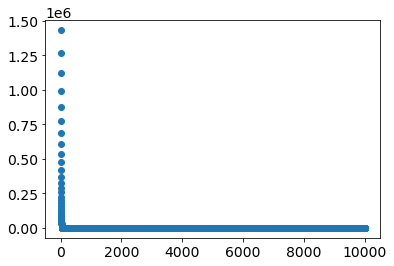

In [1505]:
linear_regression_GD(train.iloc[:,0:8], train[['Y1']])

## Question 2b: Using your iterative approach 

* Fit a modetl to predict Y1 using X2 based on the training training data in Question 1 
* Predict Y1 using the testing data and compare the results with those obtained in Question 1
* Write your comments 

## Using the multi-feature function

Iteration 1: Cost 388589.494054886, Weight 
 [[-0.95764119]], 
 Bias 77.99993820151629 
Iteration 2: Cost 353532.7913381614, Weight 
 [[-0.91723853]], 
 Bias 77.99987925728945 
Iteration 3: Cost 321639.1998884982, Weight 
 [[-0.87870168]], 
 Bias 77.99982303550837 
Iteration 4: Cost 292623.3171405532, Weight 
 [[-0.84194449]], 
 Bias 77.99976941044905 
Iteration 5: Cost 266225.4919545354, Weight 
 [[-0.80688477]], 
 Bias 77.99971826219347 
Iteration 6: Cost 242209.5011054922, Weight 
 [[-0.77344412]], 
 Bias 77.99966947636152 
Iteration 7: Cost 220360.4354193226, Weight 
 [[-0.74154778]], 
 Bias 77.99962294385521 
Iteration 8: Cost 200482.77663941952, Weight 
 [[-0.71112443]], 
 Bias 77.99957856061475 
Iteration 9: Cost 182398.64781461738, Weight 
 [[-0.68210604]], 
 Bias 77.99953622738589 
Iteration 10: Cost 165946.2215518884, Weight 
 [[-0.65442774]], 
 Bias 77.99949584949799 
Iteration 11: Cost 150978.2718899011, Weight 
 [[-0.62802764]], 
 Bias 77.99945733665237 
Iteration 12: Cost

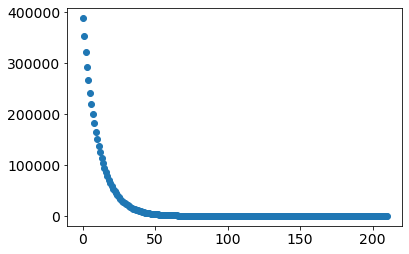

In [1536]:
# YOUR CODE GOES HERE

w , b , cost_multi =linear_regression_GD(train[['X2']],train[['Y1']])

# END of YOUR CODE 

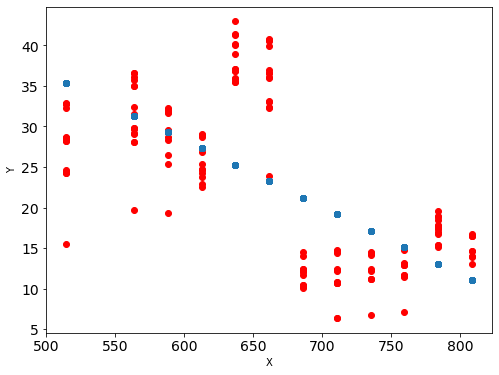

Estimated Weight: -0.08279879731210928
Estimated Bias: 77.99866338497715 
Cost: 63.4674290800199


In [1578]:
#Y = np.dot(test.[['X2']],w) + b
YY = test.X2 * float(w) + b


# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(test.X2, test.Y1, marker='o', color='red')
#plt.plot(test.X2, Y_predd, color='blue',markerfacecolor='red', markersize=10,linestyle='dashed')
plt.scatter(test.X2 , Y)
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

print(f"Estimated Weight: {float(w)}\nEstimated Bias: {float(b)} \nCost: {mean_squared_error(YY, test.Y1)}")


 We can see that in the method we did which is the iterative approach, we get MSE = 63 if we set the learning rate at the right amount. which is lower than sklearn function, the number of steps "iterations" should be at an amount where the function converges "cost[i] - cost [i-1] = $\epsilon$, and the learning rate of the step size depends on the sample itself, we can set the learning rate to be propotional to the second derivative of the loss function $$ \frac{\partial^2}{\partial \theta_j^2} J(\theta_0,\theta_j)=\frac{1}{m}\sum_i^m x_i^2$$ 
 But in here I took it as a small scalar because I didn't get consistent results with having the learning rate = second partial derivative of the w or $\theta_1$







<br>
<br>
<br>








###  Appendix: Another method by using one feature only  <span style="color:red">
by using this method we can see the relation between the weight vector and the gradient descent

In [1579]:
def gradient_descent_one_feature(x, y, iterations=5000, learning_rate = 1e-3,
                     stopping_threshold = 1e-8):
     
    # Initializing weight, bias, learning rate and iterations
    w = np.random.randint(-1,0)
    b = np.random.randint(-100,100)
    iterations
    learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    prev_cost = 0.0
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_hat = (w * x) + b
         
        # Calculationg the current cost
        current_cost = mean_squared_error(y, y_hat)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if prev_cost and abs(prev_cost-current_cost)<=stopping_threshold:
            break
         
        prev_cost = current_cost
 
        costs.append(current_cost)
        weights.append(w)
         
        # Calculating the gradients
        dldw = -(1/n) * np.sum(x * (y-y_hat))
        dldb = -(1/n) * np.sum(y-y_hat)
         
        # Updating weights and bias
        w = w - (learning_rate * dldw)
        b = b - (learning_rate * dldb)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {w}, Bias {b}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return w, b, costs

Iteration 1: Cost 604189.7935662867, Weight         -0.947196825257329, Bias -76.99992270151628
Iteration 2: Cost 549713.7713369834, Weight         -0.896832139840103, Bias -76.99984896107559
Iteration 3: Cost 500153.0555318462, Weight         -0.8487933325241332, Bias -76.99977861436489
Iteration 4: Cost 455064.1439226411, Weight         -0.8029729925540954, Bias -76.99971150465923
Iteration 5: Cost 414043.5509575072, Weight         -0.7592686694820658, Bias -76.99964748247136
Iteration 6: Cost 376724.1971040391, Weight         -0.717582644096891, Bias -76.99958640521744
Iteration 7: Cost 342772.1239776325, Weight         -0.6778217099322055, Bias -76.99952813689826
Iteration 8: Cost 311883.50585987465, Weight         -0.6398969648645707, Bias -76.99947254779516
Iteration 9: Cost 283781.930864062, Weight         -0.6037236123357637, Bias -76.99941951417998
Iteration 10: Cost 258215.92741790568, Weight         -0.5692207717547666, Bias -76.9993689180384
Iteration 11: Cost 234956.713928

Iteration 138: Cost 437.0005419945465, Weight         0.1417257100233224, Bias -76.9982992517439
Iteration 139: Cost 436.8717411836466, Weight         0.14180315237256838, Bias -76.99829888631147
Iteration 140: Cost 436.75456180109205, Weight         0.14187701836035976, Bias -76.99829852609737
Iteration 141: Cost 436.647955259283, Weight         0.14194747314568962, Bias -76.99829817086062
Iteration 142: Cost 436.55096758342637, Weight         0.14201467426038766, Bias -76.99829782037136
Iteration 143: Cost 436.4627308747349, Weight         0.14207877196134824, Bias -76.99829747441035
Iteration 144: Cost 436.382455543893, Weight         0.1421399095664922, Bias -76.99829713276846
Iteration 145: Cost 436.3094232452855, Weight         0.14219822377521377, Bias -76.99829679524623
Iteration 146: Cost 436.24298044876423, Weight         0.14225384497402896, Bias -76.99829646165342
Iteration 147: Cost 436.18253259142625, Weight         0.14230689752810893, Bias -76.99829613180857
Iteration 1

Iteration 290: Cost 435.5728721862791, Weight         0.143401333965472, Bias -76.99825843670703
Iteration 291: Cost 435.57287083809103, Weight         0.14340139218753264, Bias -76.99825818418722
Iteration 292: Cost 435.5728694965549, Weight         0.14340144770384605, Bias -76.99825793167135
Iteration 293: Cost 435.5728681610707, Weight         0.1434015006393656, Bias -76.99825767915924
Iteration 294: Cost 435.5728668310921, Weight         0.14340155111327427, Bias -76.99825742665072
Iteration 295: Cost 435.5728655061226, Weight         0.14340159923925103, Bias -76.99825717414564
Iteration 296: Cost 435.5728641857102, Weight         0.1434016451257251, Bias -76.99825692164382
Iteration 297: Cost 435.57286286944344, Weight         0.14340168887611834, Bias -76.99825666914512
Iteration 298: Cost 435.57286155694857, Weight         0.14340173058907654, Bias -76.9982564166494
Iteration 299: Cost 435.572860247885, Weight         0.14340177035868995, Bias -76.9982561641565
Iteration 300:

Iteration 443: Cost 435.5726763761875, Weight         0.14340254541464154, Bias -76.99821981241008
Iteration 444: Cost 435.57267510172363, Weight         0.14340254508859054, Bias -76.99821955997577
Iteration 445: Cost 435.5726738272598, Weight         0.14340254476058703, Bias -76.99821930754145
Iteration 446: Cost 435.57267255279584, Weight         0.14340254443072115, Bias -76.99821905510713
Iteration 447: Cost 435.57267127833177, Weight         0.1434025440990789, Bias -76.99821880267281
Iteration 448: Cost 435.57267000386804, Weight         0.14340254376574232, Bias -76.9982185502385
Iteration 449: Cost 435.5726687294043, Weight         0.14340254343078968, Bias -76.9982182978042
Iteration 450: Cost 435.57266745494036, Weight         0.14340254309429556, Bias -76.9982180453699
Iteration 451: Cost 435.5726661804766, Weight         0.14340254275633119, Bias -76.99821779293559
Iteration 452: Cost 435.57266490601273, Weight         0.14340254241696446, Bias -76.99821754050129
Iteratio

Iteration 585: Cost 435.5724954023635, Weight         0.14340249402603095, Bias -76.99818396674782
Iteration 586: Cost 435.57249412790026, Weight         0.14340249365775104, Bias -76.99818371431361
Iteration 587: Cost 435.5724928534371, Weight         0.14340249328946877, Bias -76.9981834618794
Iteration 588: Cost 435.5724915789737, Weight         0.14340249292118426, Bias -76.9981832094452
Iteration 589: Cost 435.57249030451055, Weight         0.14340249255289758, Bias -76.998182957011
Iteration 590: Cost 435.5724890300473, Weight         0.14340249218460885, Bias -76.99818270457679
Iteration 591: Cost 435.5724877555842, Weight         0.14340249181631815, Bias -76.99818245214259
Iteration 592: Cost 435.5724864811208, Weight         0.14340249144802558, Bias -76.99818219970838
Iteration 593: Cost 435.57248520665763, Weight         0.14340249107973121, Bias -76.99818194727418
Iteration 594: Cost 435.57248393219425, Weight         0.14340249071143515, Bias -76.99818169483997
Iteration 

Iteration 720: Cost 435.57232334986475, Weight         0.1434024443024312, Bias -76.99814988813442
Iteration 721: Cost 435.57232207540216, Weight         0.14340244393410015, Bias -76.99814963570027
Iteration 722: Cost 435.57232080093956, Weight         0.1434024435657691, Bias -76.99814938326612
Iteration 723: Cost 435.57231952647686, Weight         0.14340244319743803, Bias -76.99814913083198
Iteration 724: Cost 435.5723182520142, Weight         0.14340244282910697, Bias -76.99814887839783
Iteration 725: Cost 435.5723169775514, Weight         0.1434024424607759, Bias -76.99814862596368
Iteration 726: Cost 435.5723157030889, Weight         0.14340244209244485, Bias -76.99814837352953
Iteration 727: Cost 435.5723144286261, Weight         0.1434024417241138, Bias -76.99814812109538
Iteration 728: Cost 435.5723131541635, Weight         0.14340244135578273, Bias -76.99814786866123
Iteration 729: Cost 435.57231187970086, Weight         0.14340244098745164, Bias -76.9981476162271
Iteration 

Iteration 870: Cost 435.5721321805135, Weight         0.14340238905276947, Bias -76.9981120230175
Iteration 871: Cost 435.5721309060515, Weight         0.14340238868443844, Bias -76.99811177058342
Iteration 872: Cost 435.57212963158946, Weight         0.1434023883161074, Bias -76.99811151814934
Iteration 873: Cost 435.5721283571275, Weight         0.14340238794777638, Bias -76.99811126571527
Iteration 874: Cost 435.57212708266553, Weight         0.14340238757944535, Bias -76.99811101328119
Iteration 875: Cost 435.5721258082035, Weight         0.1434023872111143, Bias -76.99811076084711
Iteration 876: Cost 435.57212453374143, Weight         0.14340238684278328, Bias -76.99811050841303
Iteration 877: Cost 435.5721232592794, Weight         0.14340238647445225, Bias -76.99811025597896
Iteration 878: Cost 435.57212198481744, Weight         0.14340238610612122, Bias -76.99811000354488
Iteration 879: Cost 435.5721207103556, Weight         0.14340238573779018, Bias -76.9981097511108
Iteration 

Iteration 1015: Cost 435.57194738356543, Weight         0.14340233564477461, Bias -76.99807542008023
Iteration 1016: Cost 435.57194610910386, Weight         0.14340233527644367, Bias -76.9980751676462
Iteration 1017: Cost 435.57194483464264, Weight         0.14340233490811272, Bias -76.99807491521219
Iteration 1018: Cost 435.5719435601813, Weight         0.14340233453978177, Bias -76.99807466277817
Iteration 1019: Cost 435.5719422857199, Weight         0.14340233417145082, Bias -76.99807441034415
Iteration 1020: Cost 435.5719410112585, Weight         0.14340233380311987, Bias -76.99807415791012
Iteration 1021: Cost 435.57193973679716, Weight         0.14340233343478892, Bias -76.9980739054761
Iteration 1022: Cost 435.57193846233565, Weight         0.14340233306645797, Bias -76.99807365304208
Iteration 1023: Cost 435.57193718787425, Weight         0.14340233269812702, Bias -76.99807340060806
Iteration 1024: Cost 435.5719359134129, Weight         0.14340233232979607, Bias -76.99807314817

Iteration 1172: Cost 435.57174729317836, Weight         0.14340227781682233, Bias -76.99803578794437
Iteration 1173: Cost 435.5717460187175, Weight         0.14340227744849146, Bias -76.99803553551043
Iteration 1174: Cost 435.57174474425693, Weight         0.1434022770801606, Bias -76.99803528307648
Iteration 1175: Cost 435.57174346979616, Weight         0.14340227671182973, Bias -76.99803503064253
Iteration 1176: Cost 435.5717421953355, Weight         0.14340227634349886, Bias -76.99803477820858
Iteration 1177: Cost 435.57174092087473, Weight         0.143402275975168, Bias -76.99803452577463
Iteration 1178: Cost 435.5717396464141, Weight         0.14340227560683713, Bias -76.99803427334068
Iteration 1179: Cost 435.57173837195336, Weight         0.14340227523850627, Bias -76.99803402090673
Iteration 1180: Cost 435.57173709749264, Weight         0.1434022748701754, Bias -76.99803376847278
Iteration 1181: Cost 435.57173582303193, Weight         0.14340227450184456, Bias -76.998033516038

Iteration 1318: Cost 435.57156122195784, Weight         0.1434022240405237, Bias -76.99799893259178
Iteration 1319: Cost 435.5715599474976, Weight         0.14340222367219294, Bias -76.99799868015789
Iteration 1320: Cost 435.57155867303754, Weight         0.14340222330386218, Bias -76.997998427724
Iteration 1321: Cost 435.5715573985774, Weight         0.14340222293553143, Bias -76.9979981752901
Iteration 1322: Cost 435.5715561241173, Weight         0.14340222256720067, Bias -76.99799792285621
Iteration 1323: Cost 435.5715548496573, Weight         0.14340222219886992, Bias -76.99799767042232
Iteration 1324: Cost 435.57155357519713, Weight         0.14340222183053913, Bias -76.99799741798843
Iteration 1325: Cost 435.571552300737, Weight         0.14340222146220838, Bias -76.99799716555454
Iteration 1326: Cost 435.5715510262771, Weight         0.14340222109387762, Bias -76.99799691312064
Iteration 1327: Cost 435.57154975181686, Weight         0.14340222072554687, Bias -76.99799666068675
I

Iteration 1478: Cost 435.57135730839616, Weight         0.14340216510760895, Bias -76.99795854317466
Iteration 1479: Cost 435.57135603393675, Weight         0.14340216473927828, Bias -76.99795829074084
Iteration 1480: Cost 435.5713547594773, Weight         0.1434021643709476, Bias -76.99795803830702
Iteration 1481: Cost 435.5713534850179, Weight         0.14340216400261693, Bias -76.9979577858732
Iteration 1482: Cost 435.5713522105586, Weight         0.14340216363428626, Bias -76.99795753343938
Iteration 1483: Cost 435.5713509360991, Weight         0.1434021632659556, Bias -76.99795728100555
Iteration 1484: Cost 435.57134966163994, Weight         0.14340216289762492, Bias -76.99795702857173
Iteration 1485: Cost 435.5713483871803, Weight         0.14340216252929425, Bias -76.99795677613791
Iteration 1486: Cost 435.57134711272096, Weight         0.14340216216096358, Bias -76.99795652370409
Iteration 1487: Cost 435.57134583826155, Weight         0.1434021617926329, Bias -76.99795627127027

Iteration 1650: Cost 435.5711381014397, Weight         0.14340210175474313, Bias -76.99791512456336
Iteration 1651: Cost 435.571136826981, Weight         0.14340210138641257, Bias -76.99791487212961
Iteration 1652: Cost 435.5711355525224, Weight         0.143402101018082, Bias -76.99791461969586
Iteration 1653: Cost 435.57113427806365, Weight         0.14340210064975145, Bias -76.99791436726211
Iteration 1654: Cost 435.57113300360504, Weight         0.1434021002814209, Bias -76.99791411482836
Iteration 1655: Cost 435.5711317291464, Weight         0.14340209991309033, Bias -76.99791386239461
Iteration 1656: Cost 435.57113045468776, Weight         0.14340209954475977, Bias -76.99791360996086
Iteration 1657: Cost 435.57112918022904, Weight         0.1434020991764292, Bias -76.99791335752711
Iteration 1658: Cost 435.5711279057703, Weight         0.14340209880809865, Bias -76.99791310509336
Iteration 1659: Cost 435.5711266313117, Weight         0.1434020984397681, Bias -76.99791285265961
It

Iteration 1795: Cost 435.57095330497594, Weight         0.14340204834681816, Bias -76.99787852167402
Iteration 1796: Cost 435.5709520305179, Weight         0.14340204797848768, Bias -76.99787826924033
Iteration 1797: Cost 435.57095075605974, Weight         0.1434020476101572, Bias -76.99787801680664
Iteration 1798: Cost 435.57094948160176, Weight         0.14340204724182673, Bias -76.99787776437294
Iteration 1799: Cost 435.5709482071437, Weight         0.14340204687349625, Bias -76.99787751193925
Iteration 1800: Cost 435.57094693268556, Weight         0.14340204650516578, Bias -76.99787725950556
Iteration 1801: Cost 435.5709456582275, Weight         0.1434020461368353, Bias -76.99787700707188
Iteration 1802: Cost 435.57094438376953, Weight         0.14340204576850482, Bias -76.9978767546382
Iteration 1803: Cost 435.5709431093115, Weight         0.14340204540017434, Bias -76.99787650220452
Iteration 1804: Cost 435.5709418348535, Weight         0.14340204503184387, Bias -76.9978762497708

Iteration 1941: Cost 435.57076723414497, Weight         0.14340199457057576, Bias -76.99784166636002
Iteration 1942: Cost 435.57076595968744, Weight         0.14340199420224536, Bias -76.9978414139264
Iteration 1943: Cost 435.5707646852301, Weight         0.143401993833915, Bias -76.99784116149277
Iteration 1944: Cost 435.57076341077266, Weight         0.14340199346558463, Bias -76.99784090905915
Iteration 1945: Cost 435.57076213631535, Weight         0.14340199309725427, Bias -76.99784065662553
Iteration 1946: Cost 435.5707608618579, Weight         0.1434019927289239, Bias -76.9978404041919
Iteration 1947: Cost 435.5707595874006, Weight         0.14340199236059353, Bias -76.99784015175828
Iteration 1948: Cost 435.57075831294304, Weight         0.14340199199226317, Bias -76.99783989932466
Iteration 1949: Cost 435.57075703848574, Weight         0.1434019916239328, Bias -76.99783964689104
Iteration 1950: Cost 435.57075576402843, Weight         0.14340199125560243, Bias -76.99783939445742

Iteration 2107: Cost 435.5705556742698, Weight         0.1434019334277411, Bias -76.99779976238382
Iteration 2108: Cost 435.5705543998131, Weight         0.14340193305941082, Bias -76.99779950995027
Iteration 2109: Cost 435.57055312535647, Weight         0.14340193269108054, Bias -76.99779925751672
Iteration 2110: Cost 435.57055185089973, Weight         0.14340193232275025, Bias -76.99779900508317
Iteration 2111: Cost 435.57055057644317, Weight         0.14340193195441997, Bias -76.99779875264962
Iteration 2112: Cost 435.57054930198643, Weight         0.1434019315860897, Bias -76.99779850021606
Iteration 2113: Cost 435.5705480275297, Weight         0.1434019312177594, Bias -76.99779824778251
Iteration 2114: Cost 435.57054675307296, Weight         0.14340193084942912, Bias -76.99779799534896
Iteration 2115: Cost 435.57054547861634, Weight         0.14340193048109884, Bias -76.99779774291541
Iteration 2116: Cost 435.5705442041597, Weight         0.14340193011276856, Bias -76.997797490481

Iteration 2219: Cost 435.5704129351439, Weight         0.1434018921747537, Bias -76.99777148982821
Iteration 2220: Cost 435.5704116606876, Weight         0.1434018918064235, Bias -76.9977712373947
Iteration 2221: Cost 435.57041038623134, Weight         0.1434018914380933, Bias -76.99777098496119
Iteration 2222: Cost 435.5704091117751, Weight         0.1434018910697631, Bias -76.99777073252768
Iteration 2223: Cost 435.570407837319, Weight         0.1434018907014329, Bias -76.99777048009418
Iteration 2224: Cost 435.5704065628628, Weight         0.1434018903331027, Bias -76.99777022766067
Iteration 2225: Cost 435.5704052884064, Weight         0.1434018899647725, Bias -76.99776997522716
Iteration 2226: Cost 435.5704040139502, Weight         0.1434018895964423, Bias -76.99776972279365
Iteration 2227: Cost 435.57040273949406, Weight         0.1434018892281121, Bias -76.99776947036014
Iteration 2228: Cost 435.5704014650379, Weight         0.1434018888597819, Bias -76.99776921792663
Iteration 

Iteration 2401: Cost 435.5701809841783, Weight         0.1434018251386658, Bias -76.99772554693659
Iteration 2402: Cost 435.5701797097228, Weight         0.14340182477033572, Bias -76.99772529450316
Iteration 2403: Cost 435.5701784352673, Weight         0.14340182440200563, Bias -76.99772504206972
Iteration 2404: Cost 435.5701771608118, Weight         0.14340182403367555, Bias -76.9977247896363
Iteration 2405: Cost 435.5701758863565, Weight         0.14340182366534546, Bias -76.99772453720287
Iteration 2406: Cost 435.570174611901, Weight         0.14340182329701537, Bias -76.99772428476945
Iteration 2407: Cost 435.5701733374457, Weight         0.14340182292868528, Bias -76.99772403233602
Iteration 2408: Cost 435.57017206299025, Weight         0.1434018225603552, Bias -76.9977237799026
Iteration 2409: Cost 435.5701707885348, Weight         0.1434018221920251, Bias -76.99772352746918
Iteration 2410: Cost 435.57016951407945, Weight         0.143401821823695, Bias -76.99772327503575
Iterat

Iteration 2547: Cost 435.5699949137263, Weight         0.1434017713624783, Bias -76.99768869166014
Iteration 2548: Cost 435.56999363927156, Weight         0.1434017709941483, Bias -76.99768843922678
Iteration 2549: Cost 435.5699923648167, Weight         0.1434017706258183, Bias -76.99768818679341
Iteration 2550: Cost 435.56999109036195, Weight         0.1434017702574883, Bias -76.99768793436004
Iteration 2551: Cost 435.56998981590715, Weight         0.1434017698891583, Bias -76.99768768192668
Iteration 2552: Cost 435.5699885414524, Weight         0.14340176952082828, Bias -76.99768742949331
Iteration 2553: Cost 435.5699872669974, Weight         0.14340176915249828, Bias -76.99768717705994
Iteration 2554: Cost 435.5699859925427, Weight         0.14340176878416827, Bias -76.99768692462658
Iteration 2555: Cost 435.5699847180879, Weight         0.14340176841583827, Bias -76.99768667219321
Iteration 2556: Cost 435.569983443633, Weight         0.14340176804750826, Bias -76.99768641975984
Ite

Iteration 2690: Cost 435.5698126667283, Weight         0.1434017186912937, Bias -76.99765259369264
Iteration 2691: Cost 435.5698113922741, Weight         0.14340171832296378, Bias -76.99765234125933
Iteration 2692: Cost 435.5698101178199, Weight         0.14340171795463386, Bias -76.99765208882602
Iteration 2693: Cost 435.5698088433656, Weight         0.14340171758630393, Bias -76.9976518363927
Iteration 2694: Cost 435.56980756891153, Weight         0.143401717217974, Bias -76.9976515839594
Iteration 2695: Cost 435.56980629445735, Weight         0.1434017168496441, Bias -76.99765133152609
Iteration 2696: Cost 435.56980502000295, Weight         0.14340171648131417, Bias -76.99765107909278
Iteration 2697: Cost 435.5698037455487, Weight         0.14340171611298425, Bias -76.99765082665947
Iteration 2698: Cost 435.5698024710946, Weight         0.14340171574465432, Bias -76.99765057422616
Iteration 2699: Cost 435.5698011966404, Weight         0.1434017153763244, Bias -76.99765032179285
Iter

Iteration 2832: Cost 435.5696316942713, Weight         0.14340166638845153, Bias -76.99761674816702
Iteration 2833: Cost 435.5696304198177, Weight         0.1434016660201217, Bias -76.99761649573377
Iteration 2834: Cost 435.5696291453641, Weight         0.14340166565179185, Bias -76.99761624330051
Iteration 2835: Cost 435.56962787091044, Weight         0.14340166528346202, Bias -76.99761599086726
Iteration 2836: Cost 435.569626596457, Weight         0.14340166491513218, Bias -76.997615738434
Iteration 2837: Cost 435.569625322003, Weight         0.14340166454680234, Bias -76.99761548600075
Iteration 2838: Cost 435.5696240475495, Weight         0.1434016641784725, Bias -76.9976152335675
Iteration 2839: Cost 435.5696227730959, Weight         0.14340166381014266, Bias -76.99761498113425
Iteration 2840: Cost 435.5696214986423, Weight         0.14340166344181282, Bias -76.99761472870101
Iteration 2841: Cost 435.56962022418855, Weight         0.14340166307348298, Bias -76.99761447626777
Itera

Iteration 2964: Cost 435.569463466431, Weight         0.14340161776891935, Bias -76.99758342698189
Iteration 2965: Cost 435.56946219197806, Weight         0.1434016174005896, Bias -76.9975831745487
Iteration 2966: Cost 435.569460917525, Weight         0.14340161703225984, Bias -76.9975829221155
Iteration 2967: Cost 435.56945964307187, Weight         0.1434016166639301, Bias -76.9975826696823
Iteration 2968: Cost 435.5694583686188, Weight         0.14340161629560033, Bias -76.9975824172491
Iteration 2969: Cost 435.5694570941657, Weight         0.14340161592727058, Bias -76.99758216481591
Iteration 2970: Cost 435.5694558197127, Weight         0.14340161555894082, Bias -76.99758191238271
Iteration 2971: Cost 435.56945454525965, Weight         0.14340161519061106, Bias -76.99758165994952
Iteration 2972: Cost 435.5694532708066, Weight         0.1434016148222813, Bias -76.99758140751632
Iteration 2973: Cost 435.56945199635345, Weight         0.14340161445395155, Bias -76.99758115508313
Itera

Iteration 3114: Cost 435.5692722985213, Weight         0.143401562519464, Bias -76.99754556200774
Iteration 3115: Cost 435.56927102406894, Weight         0.14340156215113437, Bias -76.99754530957462
Iteration 3116: Cost 435.5692697496166, Weight         0.14340156178280472, Bias -76.9975450571415
Iteration 3117: Cost 435.56926847516417, Weight         0.14340156141447508, Bias -76.99754480470837
Iteration 3118: Cost 435.5692672007118, Weight         0.14340156104614543, Bias -76.99754455227524
Iteration 3119: Cost 435.56926592625945, Weight         0.1434015606778158, Bias -76.99754429984212
Iteration 3120: Cost 435.56926465180703, Weight         0.14340156030948614, Bias -76.997544047409
Iteration 3121: Cost 435.56926337735456, Weight         0.1434015599411565, Bias -76.99754379497587
Iteration 3122: Cost 435.5692621029023, Weight         0.14340155957282685, Bias -76.99754354254274
Iteration 3123: Cost 435.56926082844996, Weight         0.1434015592044972, Bias -76.99754329010962
It

Iteration 3261: Cost 435.56908495406344, Weight         0.14340150837501142, Bias -76.99750845434237
Iteration 3262: Cost 435.5690836796117, Weight         0.14340150800668186, Bias -76.9975082019093
Iteration 3263: Cost 435.56908240515975, Weight         0.1434015076383523, Bias -76.99750794947623
Iteration 3264: Cost 435.5690811307081, Weight         0.14340150727002274, Bias -76.99750769704316
Iteration 3265: Cost 435.5690798562563, Weight         0.14340150690169318, Bias -76.9975074446101
Iteration 3266: Cost 435.5690785818045, Weight         0.14340150653336362, Bias -76.99750719217703
Iteration 3267: Cost 435.5690773073528, Weight         0.14340150616503405, Bias -76.99750693974396
Iteration 3268: Cost 435.56907603290097, Weight         0.1434015057967045, Bias -76.99750668731089
Iteration 3269: Cost 435.56907475844935, Weight         0.14340150542837493, Bias -76.99750643487782
Iteration 3270: Cost 435.56907348399744, Weight         0.14340150506004537, Bias -76.99750618244475

Iteration 3411: Cost 435.5688937863444, Weight         0.1434014531255837, Bias -76.99747058938709
Iteration 3412: Cost 435.56889251189324, Weight         0.14340145275725422, Bias -76.9974703369541
Iteration 3413: Cost 435.5688912374422, Weight         0.14340145238892474, Bias -76.9974700845211
Iteration 3414: Cost 435.5688899629911, Weight         0.14340145202059526, Bias -76.9974698320881
Iteration 3415: Cost 435.5688886885399, Weight         0.14340145165226578, Bias -76.9974695796551
Iteration 3416: Cost 435.56888741408875, Weight         0.1434014512839363, Bias -76.9974693272221
Iteration 3417: Cost 435.5688861396375, Weight         0.14340145091560683, Bias -76.99746907478911
Iteration 3418: Cost 435.56888486518665, Weight         0.14340145054727735, Bias -76.99746882235611
Iteration 3419: Cost 435.56888359073554, Weight         0.14340145017894787, Bias -76.99746856992311
Iteration 3420: Cost 435.5688823162845, Weight         0.1434014498106184, Bias -76.99746831749012
Iter

Iteration 3569: Cost 435.5686924231181, Weight         0.14340139492953494, Bias -76.99743070497792
Iteration 3570: Cost 435.5686911486676, Weight         0.14340139456120557, Bias -76.99743045254498
Iteration 3571: Cost 435.5686898742172, Weight         0.1434013941928762, Bias -76.99743020011203
Iteration 3572: Cost 435.56868859976674, Weight         0.14340139382454684, Bias -76.9974299476791
Iteration 3573: Cost 435.56868732531626, Weight         0.14340139345621747, Bias -76.99742969524615
Iteration 3574: Cost 435.5686860508658, Weight         0.1434013930878881, Bias -76.99742944281321
Iteration 3575: Cost 435.56868477641524, Weight         0.14340139271955873, Bias -76.99742919038027
Iteration 3576: Cost 435.56868350196487, Weight         0.14340139235122937, Bias -76.99742893794733
Iteration 3577: Cost 435.56868222751444, Weight         0.1434013919829, Bias -76.99742868551441
Iteration 3578: Cost 435.56868095306396, Weight         0.14340139161457063, Bias -76.99742843308148
I

Iteration 3714: Cost 435.56850762784626, Weight         0.14340134152178227, Bias -76.99739410220663
Iteration 3715: Cost 435.56850635339634, Weight         0.143401341153453, Bias -76.99739384977376
Iteration 3716: Cost 435.5685050789466, Weight         0.1434013407851237, Bias -76.99739359734089
Iteration 3717: Cost 435.56850380449674, Weight         0.14340134041679442, Bias -76.99739334490802
Iteration 3718: Cost 435.568502530047, Weight         0.14340134004846514, Bias -76.99739309247515
Iteration 3719: Cost 435.5685012555972, Weight         0.14340133968013585, Bias -76.99739284004228
Iteration 3720: Cost 435.56849998114734, Weight         0.14340133931180657, Bias -76.99739258760941
Iteration 3721: Cost 435.56849870669754, Weight         0.14340133894347729, Bias -76.99739233517654
Iteration 3722: Cost 435.56849743224785, Weight         0.143401338575148, Bias -76.99739208274367
Iteration 3723: Cost 435.568496157798, Weight         0.14340133820681872, Bias -76.9973918303108
It

Iteration 3853: Cost 435.56833047935993, Weight         0.14340129032401774, Bias -76.99735901404118
Iteration 3854: Cost 435.5683292049107, Weight         0.14340128995568854, Bias -76.99735876160837
Iteration 3855: Cost 435.56832793046146, Weight         0.14340128958735934, Bias -76.99735850917556
Iteration 3856: Cost 435.5683266560123, Weight         0.14340128921903014, Bias -76.99735825674274
Iteration 3857: Cost 435.56832538156306, Weight         0.14340128885070094, Bias -76.99735800430993
Iteration 3858: Cost 435.5683241071138, Weight         0.14340128848237174, Bias -76.99735775187712
Iteration 3859: Cost 435.5683228326645, Weight         0.14340128811404254, Bias -76.9973574994443
Iteration 3860: Cost 435.5683215582154, Weight         0.14340128774571334, Bias -76.9973572470115
Iteration 3861: Cost 435.5683202837662, Weight         0.14340128737738414, Bias -76.99735699457868
Iteration 3862: Cost 435.568319009317, Weight         0.14340128700905494, Bias -76.99735674214587


Iteration 3973: Cost 435.56817754548126, Weight         0.14340124612451838, Bias -76.99732872210635
Iteration 3974: Cost 435.5681762710326, Weight         0.14340124575618926, Bias -76.99732846967358
Iteration 3975: Cost 435.56817499658376, Weight         0.14340124538786014, Bias -76.9973282172408
Iteration 3976: Cost 435.56817372213504, Weight         0.14340124501953103, Bias -76.99732796480804
Iteration 3977: Cost 435.56817244768627, Weight         0.1434012446512019, Bias -76.99732771237527
Iteration 3978: Cost 435.56817117323754, Weight         0.1434012442828728, Bias -76.9973274599425
Iteration 3979: Cost 435.5681698987888, Weight         0.14340124391454367, Bias -76.99732720750974
Iteration 3980: Cost 435.5681686243403, Weight         0.14340124354621456, Bias -76.99732695507699
Iteration 3981: Cost 435.5681673498915, Weight         0.14340124317788544, Bias -76.99732670264423
Iteration 3982: Cost 435.56816607544283, Weight         0.14340124280955632, Bias -76.9973264502114

Iteration 4092: Cost 435.5680258861127, Weight         0.1434012022933569, Bias -76.99729868261038
Iteration 4093: Cost 435.5680246116646, Weight         0.14340120192502784, Bias -76.99729843017766
Iteration 4094: Cost 435.5680233372164, Weight         0.1434012015566988, Bias -76.99729817774495
Iteration 4095: Cost 435.5680220627682, Weight         0.14340120118836977, Bias -76.99729792531224
Iteration 4096: Cost 435.5680207883199, Weight         0.14340120082004074, Bias -76.99729767287953
Iteration 4097: Cost 435.5680195138719, Weight         0.14340120045171167, Bias -76.99729742044681
Iteration 4098: Cost 435.5680182394235, Weight         0.14340120008338264, Bias -76.9972971680141
Iteration 4099: Cost 435.5680169649754, Weight         0.1434011997150536, Bias -76.99729691558139
Iteration 4100: Cost 435.5680156905272, Weight         0.14340119934672457, Bias -76.99729666314867
Iteration 4101: Cost 435.568014416079, Weight         0.14340119897839554, Bias -76.99729641071596
Itera

Iteration 4226: Cost 435.56785511008957, Weight         0.14340115293726977, Bias -76.99726485663048
Iteration 4227: Cost 435.5678538356419, Weight         0.1434011525689408, Bias -76.99726460419782
Iteration 4228: Cost 435.5678525611943, Weight         0.1434011522006118, Bias -76.99726435176517
Iteration 4229: Cost 435.5678512867469, Weight         0.14340115183228283, Bias -76.99726409933251
Iteration 4230: Cost 435.567850012299, Weight         0.14340115146395388, Bias -76.99726384689986
Iteration 4231: Cost 435.56784873785136, Weight         0.14340115109562493, Bias -76.9972635944672
Iteration 4232: Cost 435.56784746340395, Weight         0.14340115072729598, Bias -76.99726334203454
Iteration 4233: Cost 435.5678461889562, Weight         0.14340115035896703, Bias -76.99726308960189
Iteration 4234: Cost 435.56784491450856, Weight         0.14340114999063808, Bias -76.99726283716923
Iteration 4235: Cost 435.5678436400609, Weight         0.14340114962230913, Bias -76.99726258473657


Iteration 4392: Cost 435.5676435518391, Weight         0.14340109179466984, Bias -76.99722295281519
Iteration 4393: Cost 435.56764227739217, Weight         0.14340109142634097, Bias -76.99722270038261
Iteration 4394: Cost 435.5676410029453, Weight         0.1434010910580121, Bias -76.99722244795002
Iteration 4395: Cost 435.5676397284984, Weight         0.14340109068968324, Bias -76.99722219551744
Iteration 4396: Cost 435.5676384540516, Weight         0.14340109032135437, Bias -76.99722194308485
Iteration 4397: Cost 435.56763717960456, Weight         0.1434010899530255, Bias -76.99722169065227
Iteration 4398: Cost 435.5676359051576, Weight         0.14340108958469663, Bias -76.99722143821968
Iteration 4399: Cost 435.5676346307108, Weight         0.14340108921636777, Bias -76.9972211857871
Iteration 4400: Cost 435.56763335626385, Weight         0.1434010888480389, Bias -76.99722093335451
Iteration 4401: Cost 435.567632081817, Weight         0.14340108847971003, Bias -76.99722068092193
It

Iteration 4550: Cost 435.56744218927656, Weight         0.1434010335987168, Bias -76.99718306847171
Iteration 4551: Cost 435.5674409148303, Weight         0.14340103323038805, Bias -76.9971828160392
Iteration 4552: Cost 435.56743964038407, Weight         0.1434010328620593, Bias -76.99718256360669
Iteration 4553: Cost 435.56743836593785, Weight         0.14340103249373054, Bias -76.99718231117417
Iteration 4554: Cost 435.5674370914915, Weight         0.14340103212540178, Bias -76.99718205874166
Iteration 4555: Cost 435.5674358170454, Weight         0.14340103175707303, Bias -76.99718180630914
Iteration 4556: Cost 435.5674345425993, Weight         0.14340103138874427, Bias -76.99718155387663
Iteration 4557: Cost 435.56743326815297, Weight         0.14340103102041551, Bias -76.99718130144412
Iteration 4558: Cost 435.56743199370675, Weight         0.14340103065208676, Bias -76.9971810490116
Iteration 4559: Cost 435.5674307192606, Weight         0.143401030283758, Bias -76.99718079657909
I

Iteration 4697: Cost 435.5672548457229, Weight         0.1434009794543949, Bias -76.9971459608959
Iteration 4698: Cost 435.56725357127726, Weight         0.14340097908606622, Bias -76.99714570846345
Iteration 4699: Cost 435.5672522968316, Weight         0.14340097871773755, Bias -76.99714545603099
Iteration 4700: Cost 435.5672510223861, Weight         0.14340097834940888, Bias -76.99714520359854
Iteration 4701: Cost 435.56724974794037, Weight         0.1434009779810802, Bias -76.99714495116608
Iteration 4702: Cost 435.5672484734947, Weight         0.14340097761275153, Bias -76.99714469873362
Iteration 4703: Cost 435.5672471990491, Weight         0.14340097724442286, Bias -76.99714444630116
Iteration 4704: Cost 435.5672459246035, Weight         0.14340097687609418, Bias -76.9971441938687
Iteration 4705: Cost 435.5672446501579, Weight         0.1434009765077655, Bias -76.99714394143625
Iteration 4706: Cost 435.5672433757123, Weight         0.14340097613943684, Bias -76.99714368900379
Ite

Iteration 4846: Cost 435.5670649533715, Weight         0.14340092457342904, Bias -76.9971083484644
Iteration 4847: Cost 435.56706367892644, Weight         0.14340092420510045, Bias -76.997108096032
Iteration 4848: Cost 435.5670624044813, Weight         0.14340092383677186, Bias -76.9971078435996
Iteration 4849: Cost 435.56706113003634, Weight         0.14340092346844327, Bias -76.9971075911672
Iteration 4850: Cost 435.5670598555914, Weight         0.14340092310011468, Bias -76.9971073387348
Iteration 4851: Cost 435.56705858114634, Weight         0.1434009227317861, Bias -76.99710708630242
Iteration 4852: Cost 435.5670573067014, Weight         0.1434009223634575, Bias -76.99710683387003
Iteration 4853: Cost 435.56705603225646, Weight         0.1434009219951289, Bias -76.99710658143765
Iteration 4854: Cost 435.5670547578117, Weight         0.14340092162680032, Bias -76.99710632900526
Iteration 4855: Cost 435.56705348336664, Weight         0.14340092125847173, Bias -76.99710607657288
Iter

Iteration 5005: Cost 435.566862316672, Weight         0.14340086600919213, Bias -76.99706821171907
Iteration 5006: Cost 435.5668610422277, Weight         0.14340086564086366, Bias -76.99706795928674
Iteration 5007: Cost 435.5668597677832, Weight         0.14340086527253518, Bias -76.99706770685441
Iteration 5008: Cost 435.56685849333905, Weight         0.1434008649042067, Bias -76.99706745442208
Iteration 5009: Cost 435.5668572188947, Weight         0.14340086453587822, Bias -76.99706720198975
Iteration 5010: Cost 435.5668559444504, Weight         0.14340086416754974, Bias -76.99706694955742
Iteration 5011: Cost 435.5668546700061, Weight         0.14340086379922126, Bias -76.99706669712509
Iteration 5012: Cost 435.5668533955618, Weight         0.14340086343089278, Bias -76.99706644469276
Iteration 5013: Cost 435.56685212111756, Weight         0.1434008630625643, Bias -76.99706619226043
Iteration 5014: Cost 435.5668508466731, Weight         0.14340086269423583, Bias -76.9970659398281
It

Iteration 5147: Cost 435.5666813456228, Weight         0.14340081370655347, Bias -76.99703236633286
Iteration 5148: Cost 435.56668007117906, Weight         0.14340081333822507, Bias -76.99703211390059
Iteration 5149: Cost 435.5666787967353, Weight         0.14340081296989668, Bias -76.99703186146832
Iteration 5150: Cost 435.56667752229157, Weight         0.14340081260156828, Bias -76.99703160903604
Iteration 5151: Cost 435.5666762478478, Weight         0.1434008122332399, Bias -76.99703135660377
Iteration 5152: Cost 435.5666749734041, Weight         0.1434008118649115, Bias -76.99703110417151
Iteration 5153: Cost 435.56667369896047, Weight         0.1434008114965831, Bias -76.99703085173925
Iteration 5154: Cost 435.56667242451687, Weight         0.1434008111282547, Bias -76.997030599307
Iteration 5155: Cost 435.56667115007326, Weight         0.1434008107599263, Bias -76.99703034687474
Iteration 5156: Cost 435.56666987562943, Weight         0.1434008103915979, Bias -76.99703009444248
It

Iteration 5289: Cost 435.56650037466, Weight         0.14340076140392727, Bias -76.99699652095524
Iteration 5290: Cost 435.5664991002169, Weight         0.14340076103559896, Bias -76.99699626852303
Iteration 5291: Cost 435.5664978257738, Weight         0.14340076066727064, Bias -76.99699601609083
Iteration 5292: Cost 435.5664965513307, Weight         0.14340076029894233, Bias -76.99699576365863
Iteration 5293: Cost 435.5664952768876, Weight         0.14340075993061402, Bias -76.99699551122643
Iteration 5294: Cost 435.56649400244464, Weight         0.1434007595622857, Bias -76.99699525879423
Iteration 5295: Cost 435.56649272800155, Weight         0.1434007591939574, Bias -76.99699500636203
Iteration 5296: Cost 435.56649145355857, Weight         0.14340075882562908, Bias -76.99699475392983
Iteration 5297: Cost 435.5664901791155, Weight         0.14340075845730077, Bias -76.99699450149762
Iteration 5298: Cost 435.5664889046725, Weight         0.14340075808897246, Bias -76.99699424906542
I

Iteration 5437: Cost 435.566311757129, Weight         0.14340070689134415, Bias -76.99695916099333
Iteration 5438: Cost 435.56631048268645, Weight         0.14340070652301593, Bias -76.99695890856118
Iteration 5439: Cost 435.566309208244, Weight         0.1434007061546877, Bias -76.99695865612904
Iteration 5440: Cost 435.5663079338016, Weight         0.14340070578635947, Bias -76.9969584036969
Iteration 5441: Cost 435.5663066593591, Weight         0.14340070541803124, Bias -76.99695815126475
Iteration 5442: Cost 435.5663053849166, Weight         0.143400705049703, Bias -76.9969578988326
Iteration 5443: Cost 435.56630411047416, Weight         0.1434007046813748, Bias -76.99695764640046
Iteration 5444: Cost 435.56630283603175, Weight         0.1434007043130466, Bias -76.99695739396832
Iteration 5445: Cost 435.56630156158946, Weight         0.1434007039447184, Bias -76.99695714153617
Iteration 5446: Cost 435.56630028714693, Weight         0.14340070357639018, Bias -76.99695688910403
Itera

Iteration 5605: Cost 435.56609765085597, Weight         0.14340064501221228, Bias -76.99691675239914
Iteration 5606: Cost 435.5660963764142, Weight         0.14340064464388416, Bias -76.99691649996707
Iteration 5607: Cost 435.56609510197245, Weight         0.14340064427555604, Bias -76.996916247535
Iteration 5608: Cost 435.56609382753066, Weight         0.14340064390722793, Bias -76.99691599510292
Iteration 5609: Cost 435.56609255308894, Weight         0.1434006435388998, Bias -76.99691574267085
Iteration 5610: Cost 435.56609127864726, Weight         0.1434006431705717, Bias -76.99691549023878
Iteration 5611: Cost 435.5660900042055, Weight         0.14340064280224357, Bias -76.9969152378067
Iteration 5612: Cost 435.56608872976375, Weight         0.14340064243391545, Bias -76.99691498537463
Iteration 5613: Cost 435.5660874553221, Weight         0.14340064206558734, Bias -76.99691473294256
Iteration 5614: Cost 435.5660861808801, Weight         0.14340064169725922, Bias -76.99691448051048

Iteration 5746: Cost 435.56591795461276, Weight         0.14340059307795433, Bias -76.9968811594811
Iteration 5747: Cost 435.56591668017154, Weight         0.1434005927096263, Bias -76.99688090704909
Iteration 5748: Cost 435.56591540573044, Weight         0.14340059234129826, Bias -76.99688065461707
Iteration 5749: Cost 435.5659141312893, Weight         0.14340059197297023, Bias -76.99688040218506
Iteration 5750: Cost 435.5659128568482, Weight         0.1434005916046422, Bias -76.99688014975304
Iteration 5751: Cost 435.5659115824072, Weight         0.14340059123631416, Bias -76.99687989732102
Iteration 5752: Cost 435.5659103079658, Weight         0.14340059086798612, Bias -76.996879644889
Iteration 5753: Cost 435.5659090335247, Weight         0.1434005904996581, Bias -76.99687939245699
Iteration 5754: Cost 435.56590775908364, Weight         0.14340059013133005, Bias -76.99687914002497
Iteration 5755: Cost 435.5659064846424, Weight         0.14340058976300202, Bias -76.99687888759297
It

Iteration 5902: Cost 435.56571914184747, Weight         0.1434005356187897, Bias -76.99684178009228
Iteration 5903: Cost 435.56571786740693, Weight         0.14340053525046179, Bias -76.99684152766034
Iteration 5904: Cost 435.5657165929666, Weight         0.14340053488213386, Bias -76.99684127522839
Iteration 5905: Cost 435.56571531852586, Weight         0.14340053451380594, Bias -76.99684102279645
Iteration 5906: Cost 435.56571404408555, Weight         0.14340053414547801, Bias -76.9968407703645
Iteration 5907: Cost 435.5657127696452, Weight         0.1434005337771501, Bias -76.99684051793255
Iteration 5908: Cost 435.5657114952046, Weight         0.14340053340882217, Bias -76.99684026550061
Iteration 5909: Cost 435.5657102207643, Weight         0.14340053304049424, Bias -76.99684001306866
Iteration 5910: Cost 435.5657089463238, Weight         0.14340053267216632, Bias -76.99683976063672
Iteration 5911: Cost 435.5657076718834, Weight         0.1434005323038384, Bias -76.99683950820477


Iteration 6037: Cost 435.56554709242306, Weight         0.14340048589452478, Bias -76.99680770178335
Iteration 6038: Cost 435.5655458179832, Weight         0.14340048552619694, Bias -76.99680744935146
Iteration 6039: Cost 435.56554454354324, Weight         0.1434004851578691, Bias -76.99680719691958
Iteration 6040: Cost 435.5655432691034, Weight         0.14340048478954126, Bias -76.99680694448769
Iteration 6041: Cost 435.56554199466353, Weight         0.14340048442121342, Bias -76.9968066920558
Iteration 6042: Cost 435.5655407202237, Weight         0.14340048405288558, Bias -76.99680643962391
Iteration 6043: Cost 435.5655394457837, Weight         0.14340048368455774, Bias -76.99680618719202
Iteration 6044: Cost 435.56553817134386, Weight         0.1434004833162299, Bias -76.99680593476013
Iteration 6045: Cost 435.5655368969039, Weight         0.14340048294790206, Bias -76.99680568232824
Iteration 6046: Cost 435.56553562246404, Weight         0.14340048257957422, Bias -76.9968054298963

Iteration 6182: Cost 435.5653622986837, Weight         0.14340043248699355, Bias -76.99677109916384
Iteration 6183: Cost 435.5653610242445, Weight         0.1434004321186658, Bias -76.996770846732
Iteration 6184: Cost 435.5653597498051, Weight         0.14340043175033804, Bias -76.99677059430017
Iteration 6185: Cost 435.565358475366, Weight         0.14340043138201028, Bias -76.99677034186834
Iteration 6186: Cost 435.5653572009265, Weight         0.14340043101368252, Bias -76.99677008943651
Iteration 6187: Cost 435.5653559264873, Weight         0.14340043064535477, Bias -76.99676983700468
Iteration 6188: Cost 435.56535465204803, Weight         0.143400430277027, Bias -76.99676958457285
Iteration 6189: Cost 435.5653533776088, Weight         0.14340042990869925, Bias -76.99676933214101
Iteration 6190: Cost 435.56535210316946, Weight         0.1434004295403715, Bias -76.9967690797092
Iteration 6191: Cost 435.56535082873023, Weight         0.14340042917204374, Bias -76.99676882727738
Itera

Iteration 6322: Cost 435.56518387722775, Weight         0.14340038092111365, Bias -76.99673575871206
Iteration 6323: Cost 435.565182602789, Weight         0.14340038055278598, Bias -76.99673550628029
Iteration 6324: Cost 435.56518132835026, Weight         0.1434003801844583, Bias -76.99673525384853
Iteration 6325: Cost 435.5651800539116, Weight         0.14340037981613063, Bias -76.99673500141677
Iteration 6326: Cost 435.565178779473, Weight         0.14340037944780296, Bias -76.996734748985
Iteration 6327: Cost 435.56517750503446, Weight         0.14340037907947528, Bias -76.99673449655324
Iteration 6328: Cost 435.56517623059574, Weight         0.1434003787111476, Bias -76.99673424412148
Iteration 6329: Cost 435.5651749561572, Weight         0.14340037834281993, Bias -76.99673399168972
Iteration 6330: Cost 435.56517368171853, Weight         0.14340037797449226, Bias -76.99673373925796
Iteration 6331: Cost 435.56517240727993, Weight         0.1434003776061646, Bias -76.9967334868262
It

Iteration 6442: Cost 435.56503094461823, Weight         0.14340033672179767, Bias -76.99670546690295
Iteration 6443: Cost 435.5650296701801, Weight         0.14340033635347008, Bias -76.99670521447123
Iteration 6444: Cost 435.5650283957419, Weight         0.14340033598514249, Bias -76.99670496203952
Iteration 6445: Cost 435.56502712130373, Weight         0.1434003356168149, Bias -76.9967047096078
Iteration 6446: Cost 435.5650258468656, Weight         0.1434003352484873, Bias -76.99670445717608
Iteration 6447: Cost 435.56502457242755, Weight         0.1434003348801597, Bias -76.99670420474436
Iteration 6448: Cost 435.5650232979893, Weight         0.14340033451183212, Bias -76.99670395231264
Iteration 6449: Cost 435.56502202355114, Weight         0.14340033414350453, Bias -76.99670369988092
Iteration 6450: Cost 435.565020749113, Weight         0.14340033377517694, Bias -76.9967034474492
Iteration 6451: Cost 435.565019474675, Weight         0.14340033340684935, Bias -76.99670319501749
Ite

Iteration 6581: Cost 435.56485379775586, Weight         0.14340028552426784, Bias -76.9966703788983
Iteration 6582: Cost 435.56485252331805, Weight         0.14340028515594033, Bias -76.99667012646664
Iteration 6583: Cost 435.56485124888064, Weight         0.14340028478761283, Bias -76.99666987403498
Iteration 6584: Cost 435.56484997444306, Weight         0.14340028441928532, Bias -76.99666962160332
Iteration 6585: Cost 435.5648487000055, Weight         0.1434002840509578, Bias -76.99666936917166
Iteration 6586: Cost 435.564847425568, Weight         0.1434002836826303, Bias -76.99666911674
Iteration 6587: Cost 435.5648461511303, Weight         0.1434002833143028, Bias -76.99666886430833
Iteration 6588: Cost 435.56484487669275, Weight         0.1434002829459753, Bias -76.99666861187667
Iteration 6589: Cost 435.56484360225534, Weight         0.14340028257764778, Bias -76.99666835944501
Iteration 6590: Cost 435.56484232781776, Weight         0.14340028220932027, Bias -76.99666810701335
It

Iteration 6722: Cost 435.5646741021021, Weight         0.1434002335900951, Bias -76.99663478603863
Iteration 6723: Cost 435.564672827665, Weight         0.14340023322176768, Bias -76.99663453360702
Iteration 6724: Cost 435.5646715532281, Weight         0.14340023285344025, Bias -76.99663428117542
Iteration 6725: Cost 435.564670278791, Weight         0.14340023248511283, Bias -76.99663402874381
Iteration 6726: Cost 435.56466900435424, Weight         0.1434002321167854, Bias -76.99663377631222
Iteration 6727: Cost 435.56466772991723, Weight         0.14340023174845798, Bias -76.99663352388063
Iteration 6728: Cost 435.5646664554804, Weight         0.14340023138013056, Bias -76.99663327144904
Iteration 6729: Cost 435.5646651810434, Weight         0.14340023101180313, Bias -76.99663301901745
Iteration 6730: Cost 435.5646639066064, Weight         0.1434002306434757, Bias -76.99663276658586
Iteration 6731: Cost 435.5646626321697, Weight         0.14340023027514828, Bias -76.99663251415427
Ite

Iteration 6838: Cost 435.56452626744385, Weight         0.14340019086411815, Bias -76.99660550397606
Iteration 6839: Cost 435.5645249930074, Weight         0.1434001904957908, Bias -76.99660525154451
Iteration 6840: Cost 435.5645237185711, Weight         0.14340019012746347, Bias -76.99660499911296
Iteration 6841: Cost 435.5645224441345, Weight         0.14340018975913613, Bias -76.99660474668141
Iteration 6842: Cost 435.56452116969814, Weight         0.14340018939080879, Bias -76.99660449424987
Iteration 6843: Cost 435.5645198952617, Weight         0.14340018902248144, Bias -76.99660424181832
Iteration 6844: Cost 435.56451862082525, Weight         0.1434001886541541, Bias -76.99660398938677
Iteration 6845: Cost 435.5645173463888, Weight         0.14340018828582676, Bias -76.99660373695522
Iteration 6846: Cost 435.56451607195237, Weight         0.14340018791749942, Bias -76.99660348452367
Iteration 6847: Cost 435.5645147975159, Weight         0.14340018754917208, Bias -76.9966032320921

Iteration 6995: Cost 435.564326180972, Weight         0.14340013303673177, Bias -76.99656587222796
Iteration 6996: Cost 435.5643249065364, Weight         0.1434001326684045, Bias -76.99656561979648
Iteration 6997: Cost 435.56432363210064, Weight         0.14340013230007725, Bias -76.99656536736501
Iteration 6998: Cost 435.56432235766493, Weight         0.14340013193175, Bias -76.99656511493353
Iteration 6999: Cost 435.56432108322923, Weight         0.14340013156342274, Bias -76.99656486250205
Iteration 7000: Cost 435.56431980879336, Weight         0.14340013119509548, Bias -76.99656461007058
Iteration 7001: Cost 435.56431853435765, Weight         0.14340013082676822, Bias -76.9965643576391
Iteration 7002: Cost 435.56431725992195, Weight         0.14340013045844097, Bias -76.99656410520763
Iteration 7003: Cost 435.5643159854863, Weight         0.1434001300901137, Bias -76.99656385277615
Iteration 7004: Cost 435.56431471105043, Weight         0.14340012972178645, Bias -76.99656360034467


Iteration 7140: Cost 435.56414138782793, Weight         0.14340007962928644, Bias -76.99652926966743
Iteration 7141: Cost 435.5641401133929, Weight         0.14340007926095927, Bias -76.99652901723601
Iteration 7142: Cost 435.56413883895783, Weight         0.1434000788926321, Bias -76.9965287648046
Iteration 7143: Cost 435.5641375645226, Weight         0.14340007852430492, Bias -76.99652851237317
Iteration 7144: Cost 435.56413629008756, Weight         0.14340007815597774, Bias -76.99652825994175
Iteration 7145: Cost 435.56413501565225, Weight         0.14340007778765057, Bias -76.99652800751034
Iteration 7146: Cost 435.5641337412171, Weight         0.14340007741932342, Bias -76.99652775507892
Iteration 7147: Cost 435.56413246678204, Weight         0.14340007705099628, Bias -76.9965275026475
Iteration 7148: Cost 435.5641311923469, Weight         0.14340007668266913, Bias -76.99652725021608
Iteration 7149: Cost 435.56412991791177, Weight         0.14340007631434198, Bias -76.996526997784

Iteration 7262: Cost 435.56398590676923, Weight         0.14340003469337712, Bias -76.99649847303712
Iteration 7263: Cost 435.5639846323347, Weight         0.14340003432505002, Bias -76.99649822060576
Iteration 7264: Cost 435.56398335790004, Weight         0.14340003395672293, Bias -76.9964979681744
Iteration 7265: Cost 435.5639820834655, Weight         0.14340003358839584, Bias -76.99649771574303
Iteration 7266: Cost 435.56398080903085, Weight         0.14340003322006875, Bias -76.99649746331167
Iteration 7267: Cost 435.5639795345962, Weight         0.14340003285174166, Bias -76.9964972108803
Iteration 7268: Cost 435.56397826016166, Weight         0.14340003248341457, Bias -76.99649695844894
Iteration 7269: Cost 435.563976985727, Weight         0.14340003211508748, Bias -76.99649670601758
Iteration 7270: Cost 435.56397571129247, Weight         0.1434000317467604, Bias -76.99649645358622
Iteration 7271: Cost 435.5639744368578, Weight         0.1434000313784333, Bias -76.99649620115486


Iteration 7433: Cost 435.56376797850766, Weight         0.14339997170945407, Bias -76.99645530727912
Iteration 7434: Cost 435.5637667040738, Weight         0.14339997134112709, Bias -76.99645505484783
Iteration 7435: Cost 435.56376542964006, Weight         0.1433999709728001, Bias -76.99645480241654
Iteration 7436: Cost 435.56376415520606, Weight         0.14339997060447313, Bias -76.99645454998524
Iteration 7437: Cost 435.5637628807722, Weight         0.14339997023614615, Bias -76.99645429755395
Iteration 7438: Cost 435.5637616063383, Weight         0.14339996986781917, Bias -76.99645404512266
Iteration 7439: Cost 435.5637603319044, Weight         0.14339996949949219, Bias -76.99645379269137
Iteration 7440: Cost 435.5637590574706, Weight         0.1433999691311652, Bias -76.99645354026008
Iteration 7441: Cost 435.56375778303664, Weight         0.14339996876283823, Bias -76.99645328782879
Iteration 7442: Cost 435.5637565086029, Weight         0.14339996839451125, Bias -76.9964530353975

Iteration 7592: Cost 435.56356534356985, Weight         0.14339991314547154, Bias -76.99641517070823
Iteration 7593: Cost 435.56356406913665, Weight         0.14339991277714464, Bias -76.996414918277
Iteration 7594: Cost 435.5635627947034, Weight         0.14339991240881775, Bias -76.99641466584576
Iteration 7595: Cost 435.5635615202702, Weight         0.14339991204049085, Bias -76.99641441341453
Iteration 7596: Cost 435.56356024583687, Weight         0.14339991167216395, Bias -76.99641416098329
Iteration 7597: Cost 435.56355897140355, Weight         0.14339991130383709, Bias -76.99641390855207
Iteration 7598: Cost 435.5635576969703, Weight         0.14339991093551022, Bias -76.99641365612085
Iteration 7599: Cost 435.5635564225372, Weight         0.14339991056718335, Bias -76.99641340368963
Iteration 7600: Cost 435.56355514810406, Weight         0.14339991019885648, Bias -76.99641315125841
Iteration 7601: Cost 435.5635538736709, Weight         0.1433999098305296, Bias -76.9964128988271

Iteration 7719: Cost 435.5634034905841, Weight         0.14339986636796231, Bias -76.9963831119455
Iteration 7720: Cost 435.56340221615136, Weight         0.1433998659996355, Bias -76.99638285951433
Iteration 7721: Cost 435.5634009417187, Weight         0.1433998656313087, Bias -76.99638260708315
Iteration 7722: Cost 435.56339966728615, Weight         0.14339986526298187, Bias -76.99638235465197
Iteration 7723: Cost 435.5633983928533, Weight         0.14339986489465506, Bias -76.99638210222079
Iteration 7724: Cost 435.56339711842065, Weight         0.14339986452632825, Bias -76.99638184978961
Iteration 7725: Cost 435.56339584398796, Weight         0.14339986415800143, Bias -76.99638159735844
Iteration 7726: Cost 435.56339456955544, Weight         0.14339986378967462, Bias -76.99638134492726
Iteration 7727: Cost 435.5633932951226, Weight         0.1433998634213478, Bias -76.99638109249608
Iteration 7728: Cost 435.56339202068995, Weight         0.143399863053021, Bias -76.9963808400649
I

Iteration 7877: Cost 435.56320213027305, Weight         0.14339980817233475, Bias -76.99634322782502
Iteration 7878: Cost 435.56320085584093, Weight         0.14339980780400804, Bias -76.99634297539392
Iteration 7879: Cost 435.563199581409, Weight         0.14339980743568134, Bias -76.99634272296281
Iteration 7880: Cost 435.563198306977, Weight         0.14339980706735464, Bias -76.9963424705317
Iteration 7881: Cost 435.5631970325449, Weight         0.14339980669902794, Bias -76.9963422181006
Iteration 7882: Cost 435.5631957581128, Weight         0.14339980633070123, Bias -76.99634196566949
Iteration 7883: Cost 435.5631944836809, Weight         0.14339980596237453, Bias -76.99634171323838
Iteration 7884: Cost 435.5631932092491, Weight         0.14339980559404783, Bias -76.99634146080727
Iteration 7885: Cost 435.563191934817, Weight         0.14339980522572113, Bias -76.99634120837617
Iteration 7886: Cost 435.5631906603851, Weight         0.14339980485739443, Bias -76.99634095594506
Ite

Iteration 8007: Cost 435.56303645414766, Weight         0.14339976028986795, Bias -76.99631041178445
Iteration 8008: Cost 435.5630351797162, Weight         0.14339975992154133, Bias -76.9963101593534
Iteration 8009: Cost 435.5630339052849, Weight         0.1433997595532147, Bias -76.99630990692235
Iteration 8010: Cost 435.5630326308534, Weight         0.1433997591848881, Bias -76.9963096544913
Iteration 8011: Cost 435.56303135642196, Weight         0.14339975881656147, Bias -76.99630940206025
Iteration 8012: Cost 435.5630300819905, Weight         0.14339975844823485, Bias -76.9963091496292
Iteration 8013: Cost 435.5630288075592, Weight         0.14339975807990823, Bias -76.99630889719815
Iteration 8014: Cost 435.56302753312775, Weight         0.14339975771158162, Bias -76.9963086447671
Iteration 8015: Cost 435.56302625869637, Weight         0.143399757343255, Bias -76.99630839233605
Iteration 8016: Cost 435.5630249842648, Weight         0.14339975697492838, Bias -76.996308139905
Iterat

Iteration 8164: Cost 435.56283636846206, Weight         0.14339970246259512, Bias -76.99627078011422
Iteration 8165: Cost 435.5628350940313, Weight         0.14339970209426858, Bias -76.99627052768322
Iteration 8166: Cost 435.56283381960054, Weight         0.14339970172594205, Bias -76.99627027525223
Iteration 8167: Cost 435.56283254516967, Weight         0.1433997013576155, Bias -76.99627002282125
Iteration 8168: Cost 435.5628312707389, Weight         0.14339970098928898, Bias -76.99626977039027
Iteration 8169: Cost 435.56282999630827, Weight         0.14339970062096244, Bias -76.99626951795929
Iteration 8170: Cost 435.5628287218776, Weight         0.1433997002526359, Bias -76.99626926552831
Iteration 8171: Cost 435.56282744744675, Weight         0.14339969988430937, Bias -76.99626901309733
Iteration 8172: Cost 435.562826173016, Weight         0.14339969951598283, Bias -76.99626876066635
Iteration 8173: Cost 435.5628248985854, Weight         0.1433996991476563, Bias -76.99626850823537

Iteration 8321: Cost 435.56263628288235, Weight         0.14339964463533758, Bias -76.99623114845451
Iteration 8322: Cost 435.5626350084523, Weight         0.14339964426701116, Bias -76.99623089602359
Iteration 8323: Cost 435.5626337340222, Weight         0.14339964389868473, Bias -76.99623064359267
Iteration 8324: Cost 435.562632459592, Weight         0.1433996435303583, Bias -76.99623039116175
Iteration 8325: Cost 435.5626311851619, Weight         0.14339964316203188, Bias -76.99623013873082
Iteration 8326: Cost 435.5626299107319, Weight         0.14339964279370546, Bias -76.9962298862999
Iteration 8327: Cost 435.5626286363018, Weight         0.14339964242537903, Bias -76.99622963386898
Iteration 8328: Cost 435.5626273618716, Weight         0.1433996420570526, Bias -76.99622938143806
Iteration 8329: Cost 435.56262608744163, Weight         0.14339964168872618, Bias -76.99622912900713
Iteration 8330: Cost 435.5626248130114, Weight         0.14339964132039976, Bias -76.99622887657621
It

Iteration 8431: Cost 435.5624960955964, Weight         0.14339960411943367, Bias -76.99620338105579
Iteration 8432: Cost 435.56249482116647, Weight         0.1433996037511073, Bias -76.99620312862491
Iteration 8433: Cost 435.56249354673696, Weight         0.14339960338278093, Bias -76.99620287619403
Iteration 8434: Cost 435.5624922723072, Weight         0.14339960301445456, Bias -76.99620262376315
Iteration 8435: Cost 435.5624909978775, Weight         0.1433996026461282, Bias -76.99620237133229
Iteration 8436: Cost 435.562489723448, Weight         0.14339960227780182, Bias -76.99620211890142
Iteration 8437: Cost 435.56248844901836, Weight         0.14339960190947545, Bias -76.99620186647056
Iteration 8438: Cost 435.5624871745886, Weight         0.14339960154114909, Bias -76.99620161403969
Iteration 8439: Cost 435.56248590015923, Weight         0.14339960117282272, Bias -76.99620136160883
Iteration 8440: Cost 435.5624846257296, Weight         0.14339960080449635, Bias -76.99620110917796

Iteration 8571: Cost 435.5623176754887, Weight         0.14339955255374864, Bias -76.99616804073762
Iteration 8572: Cost 435.5623164010598, Weight         0.14339955218542236, Bias -76.9961677883068
Iteration 8573: Cost 435.5623151266307, Weight         0.14339955181709607, Bias -76.996167535876
Iteration 8574: Cost 435.5623138522018, Weight         0.14339955144876979, Bias -76.99616728344519
Iteration 8575: Cost 435.5623125777726, Weight         0.1433995510804435, Bias -76.99616703101438
Iteration 8576: Cost 435.56231130334373, Weight         0.1433995507121172, Bias -76.99616677858357
Iteration 8577: Cost 435.5623100289148, Weight         0.14339955034379093, Bias -76.99616652615276
Iteration 8578: Cost 435.56230875448574, Weight         0.14339954997546464, Bias -76.99616627372195
Iteration 8579: Cost 435.5623074800568, Weight         0.14339954960713835, Bias -76.99616602129115
Iteration 8580: Cost 435.5623062056278, Weight         0.1433995492388121, Bias -76.99616576886034
Iter

Iteration 8734: Cost 435.5621099436124, Weight         0.14339949251657363, Bias -76.99612689452049
Iteration 8735: Cost 435.5621086691841, Weight         0.14339949214824746, Bias -76.99612664208973
Iteration 8736: Cost 435.56210739475574, Weight         0.14339949177992128, Bias -76.996126389659
Iteration 8737: Cost 435.5621061203274, Weight         0.1433994914115951, Bias -76.99612613722826
Iteration 8738: Cost 435.5621048458992, Weight         0.14339949104326893, Bias -76.99612588479752
Iteration 8739: Cost 435.5621035714708, Weight         0.14339949067494276, Bias -76.99612563236678
Iteration 8740: Cost 435.56210229704254, Weight         0.14339949030661658, Bias -76.99612537993605
Iteration 8741: Cost 435.56210102261434, Weight         0.1433994899382904, Bias -76.99612512750531
Iteration 8742: Cost 435.56209974818586, Weight         0.14339948956996423, Bias -76.99612487507457
Iteration 8743: Cost 435.5620984737577, Weight         0.14339948920163806, Bias -76.99612462264383


Iteration 8848: Cost 435.56196465880976, Weight         0.14339945052739325, Bias -76.99609811741833
Iteration 8849: Cost 435.56196338438195, Weight         0.14339945015906716, Bias -76.99609786498763
Iteration 8850: Cost 435.56196210995404, Weight         0.14339944979074107, Bias -76.99609761255694
Iteration 8851: Cost 435.5619608355262, Weight         0.14339944942241498, Bias -76.99609736012624
Iteration 8852: Cost 435.5619595610985, Weight         0.14339944905408888, Bias -76.99609710769555
Iteration 8853: Cost 435.56195828667063, Weight         0.1433994486857628, Bias -76.99609685526485
Iteration 8854: Cost 435.5619570122427, Weight         0.1433994483174367, Bias -76.99609660283416
Iteration 8855: Cost 435.5619557378149, Weight         0.1433994479491106, Bias -76.99609635040346
Iteration 8856: Cost 435.561954463387, Weight         0.14339944758078452, Bias -76.99609609797277
Iteration 8857: Cost 435.56195318895925, Weight         0.14339944721245843, Bias -76.99609584554207

Iteration 8996: Cost 435.56177604353445, Weight         0.1433993960151364, Bias -76.99606075767981
Iteration 8997: Cost 435.5617747691073, Weight         0.1433993956468104, Bias -76.99606050524918
Iteration 8998: Cost 435.56177349468004, Weight         0.1433993952784844, Bias -76.99606025281854
Iteration 8999: Cost 435.56177222025286, Weight         0.14339939491015838, Bias -76.9960600003879
Iteration 9000: Cost 435.56177094582546, Weight         0.14339939454183237, Bias -76.99605974795726
Iteration 9001: Cost 435.5617696713983, Weight         0.14339939417350636, Bias -76.99605949552662
Iteration 9002: Cost 435.56176839697105, Weight         0.14339939380518035, Bias -76.99605924309598
Iteration 9003: Cost 435.561767122544, Weight         0.14339939343685434, Bias -76.99605899066535
Iteration 9004: Cost 435.5617658481167, Weight         0.14339939306852834, Bias -76.99605873823472
Iteration 9005: Cost 435.56176457368963, Weight         0.14339939270020233, Bias -76.9960584858041


Iteration 9163: Cost 435.56156321424885, Weight         0.14339933450470038, Bias -76.99601860176983
Iteration 9164: Cost 435.56156193982235, Weight         0.14339933413637446, Bias -76.99601834933927
Iteration 9165: Cost 435.5615606653958, Weight         0.14339933376804856, Bias -76.9960180969087
Iteration 9166: Cost 435.56155939096936, Weight         0.14339933339972266, Bias -76.99601784447813
Iteration 9167: Cost 435.5615581165428, Weight         0.14339933303139674, Bias -76.99601759204756
Iteration 9168: Cost 435.5615568421163, Weight         0.14339933266307084, Bias -76.996017339617
Iteration 9169: Cost 435.5615555676898, Weight         0.14339933229474494, Bias -76.99601708718643
Iteration 9170: Cost 435.5615542932633, Weight         0.14339933192641904, Bias -76.99601683475586
Iteration 9171: Cost 435.56155301883683, Weight         0.14339933155809315, Bias -76.9960165823253
Iteration 9172: Cost 435.5615517444102, Weight         0.14339933118976722, Bias -76.99601632989474


Iteration 9286: Cost 435.56140645982157, Weight         0.14339928920061804, Bias -76.99598755281377
Iteration 9287: Cost 435.56140518539564, Weight         0.1433992888322922, Bias -76.99598730038326
Iteration 9288: Cost 435.5614039109696, Weight         0.14339928846396635, Bias -76.99598704795275
Iteration 9289: Cost 435.56140263654356, Weight         0.1433992880956405, Bias -76.99598679552224
Iteration 9290: Cost 435.56140136211764, Weight         0.14339928772731467, Bias -76.99598654309173
Iteration 9291: Cost 435.56140008769165, Weight         0.14339928735898883, Bias -76.99598629066122
Iteration 9292: Cost 435.5613988132657, Weight         0.14339928699066298, Bias -76.99598603823071
Iteration 9293: Cost 435.56139753883986, Weight         0.14339928662233714, Bias -76.9959857858002
Iteration 9294: Cost 435.5613962644139, Weight         0.1433992862540113, Bias -76.99598553336969
Iteration 9295: Cost 435.56139498998783, Weight         0.14339928588568546, Bias -76.995985280939

Iteration 9438: Cost 435.5612127471224, Weight         0.14339923321509807, Bias -76.99594918338093
Iteration 9439: Cost 435.56121147269704, Weight         0.14339923284677233, Bias -76.99594893095048
Iteration 9440: Cost 435.5612101982718, Weight         0.1433992324784466, Bias -76.99594867852004
Iteration 9441: Cost 435.56120892384644, Weight         0.14339923211012087, Bias -76.9959484260896
Iteration 9442: Cost 435.56120764942114, Weight         0.14339923174179514, Bias -76.99594817365916
Iteration 9443: Cost 435.5612063749959, Weight         0.1433992313734694, Bias -76.99594792122872
Iteration 9444: Cost 435.56120510057065, Weight         0.14339923100514368, Bias -76.99594766879828
Iteration 9445: Cost 435.56120382614534, Weight         0.14339923063681795, Bias -76.99594741636784
Iteration 9446: Cost 435.5612025517201, Weight         0.14339923026849222, Bias -76.9959471639374
Iteration 9447: Cost 435.56120127729474, Weight         0.14339922990016649, Bias -76.9959469115069

Iteration 9601: Cost 435.56100501585166, Weight         0.14339917317801046, Bias -76.99590803722378
Iteration 9602: Cost 435.56100374142693, Weight         0.1433991728096848, Bias -76.9959077847934
Iteration 9603: Cost 435.56100246700214, Weight         0.14339917244135916, Bias -76.99590753236302
Iteration 9604: Cost 435.5610011925776, Weight         0.14339917207303352, Bias -76.99590727993264
Iteration 9605: Cost 435.56099991815285, Weight         0.14339917170470787, Bias -76.99590702750226
Iteration 9606: Cost 435.56099864372817, Weight         0.14339917133638222, Bias -76.99590677507187
Iteration 9607: Cost 435.56099736930355, Weight         0.14339917096805657, Bias -76.9959065226415
Iteration 9608: Cost 435.56099609487916, Weight         0.14339917059973092, Bias -76.99590627021114
Iteration 9609: Cost 435.5609948204545, Weight         0.14339917023140528, Bias -76.99590601778077
Iteration 9610: Cost 435.56099354602986, Weight         0.14339916986307963, Bias -76.9959057653

Iteration 9763: Cost 435.5607985591181, Weight         0.14339911350926482, Bias -76.99586714350819
Iteration 9764: Cost 435.56079728469416, Weight         0.14339911314093928, Bias -76.99586689107788
Iteration 9765: Cost 435.56079601027005, Weight         0.14339911277261375, Bias -76.99586663864757
Iteration 9766: Cost 435.5607947358463, Weight         0.1433991124042882, Bias -76.99586638621726
Iteration 9767: Cost 435.56079346142235, Weight         0.14339911203596267, Bias -76.99586613378695
Iteration 9768: Cost 435.5607921869984, Weight         0.14339911166763714, Bias -76.99586588135664
Iteration 9769: Cost 435.5607909125744, Weight         0.1433991112993116, Bias -76.99586562892632
Iteration 9770: Cost 435.5607896381505, Weight         0.14339911093098606, Bias -76.99586537649601
Iteration 9771: Cost 435.5607883637266, Weight         0.14339911056266053, Bias -76.9958651240657
Iteration 9772: Cost 435.5607870893027, Weight         0.143399110194335, Bias -76.99586487163539
It

Iteration 9896: Cost 435.5606290607727, Weight         0.14339906452197337, Bias -76.99583357028085
Iteration 9897: Cost 435.56062778634936, Weight         0.14339906415364792, Bias -76.9958333178506
Iteration 9898: Cost 435.560626511926, Weight         0.14339906378532247, Bias -76.99583306542034
Iteration 9899: Cost 435.5606252375026, Weight         0.143399063416997, Bias -76.99583281299009
Iteration 9900: Cost 435.56062396307937, Weight         0.14339906304867156, Bias -76.99583256055983
Iteration 9901: Cost 435.560622688656, Weight         0.1433990626803461, Bias -76.99583230812958
Iteration 9902: Cost 435.56062141423274, Weight         0.14339906231202065, Bias -76.99583205569932
Iteration 9903: Cost 435.56062013980926, Weight         0.1433990619436952, Bias -76.99583180326907
Iteration 9904: Cost 435.5606188653859, Weight         0.14339906157536975, Bias -76.99583155083882
Iteration 9905: Cost 435.56061759096264, Weight         0.1433990612070443, Bias -76.99583129840856
Ite

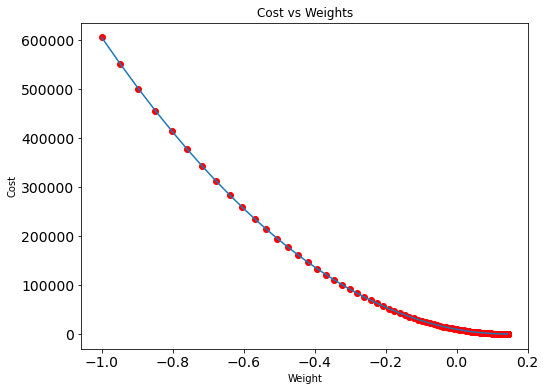

Estimated Weight: 0.14339902621612902
Estimated Bias: -76.99580731753687 
Cost: 435.560496520766


In [1581]:
estimated_weight, eatimated_bias, cost = gradient_descent_one_feature(train['X2'], train.Y1, iterations=10000, learning_rate=1e-7)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {eatimated_bias} \nCost: {cost[-1]}")
 
    
ys = estimated_weight*test.X2 + eatimated_bias

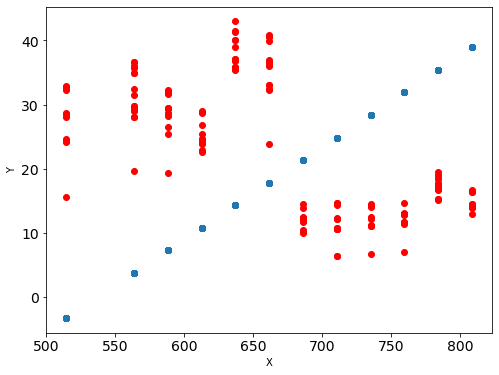

Estimated Weight: 0.14339902621612902
Estimated Bias: -76.99580731753687 
Cost: 444.9918507472083


In [1582]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(test.X2, test.Y1, marker='o', color='red')
#plt.plot(test.X2, Y_predd, color='blue',markerfacecolor='red', markersize=10,linestyle='dashed')
plt.scatter(test.X2 , ys)
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {eatimated_bias} \nCost: {mean_squared_error(ys,test.Y1)}")
